# 1. На первый-второй рассчитайсь! (5)

Сложность математического вычисления может быть выражена в $FLOPS$ (floating point operations). $FLOP$ используется как единица измерения вычислений, таких как одно вычитание, сложение, умножение, деление чисел и т. д. Например, для векторов $a,b∈R^n$ и скаляров $c,d∈R$:
- $a+b$ требует $n$ $FLOPS$ для $n$ поэлементных сложений;
- $с⋅a$ требует $n$ $FLOPS$ для $n$ поэлементных умножений;
- $c⋅d⋅a$ требует $n+1$ операцию, если вычислять выражение как $(c⋅d)⋅a$, и $2n$ операций, если как $c⋅(d⋅a)$: в таких случаях выбирается оптимальный порядок.

Стоит понимать, что операция может занимать и $0$ $FLOPS$: например, операция присвоения значения элемента вектора.

Посчитайте минимальное количество $FLOPS$ для реализации выражения:

$$
ABc + DEFg
$$

Где $A∈R^{m×n}$, $B∈R^{n×p}$, $c∈R^p$, $D∈R^{m×k}$, $E∈R^{k×l}$, $F∈R^{l×p}$, $g∈R^p$ для $m=10$, $n=7$, $p=4$, $k=3$, $l=8$.

Все значения в матрицах $A, B, D, E, F$ и векторах $c, g$ отличны от нуля.

**Формат вывода**

Одно число — количество $FLOPS$ для реализации выражения.

**Примечания**

Считать, что алгоритм перемножения двух матриц $A$ и $B$ — тривиальный и сводится к независимому друг от друга вычислению всех попарных скалярных произведений $a_i⋅b_j$, где $a_i$ — $i$-ая строчка матрицы $A$, а $b_j$ — $j$-ый столбец матрицы $B$.

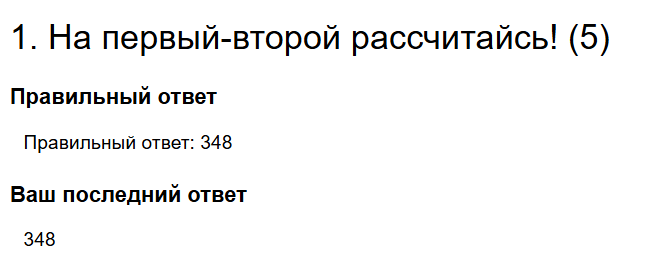

## Как считается FLOPS

1. Умножение матрицы на матрицу

Вспоминаем как умножается матрица на матрицу: перемножаются элементы строки первой матрицы на элементы столбца первой матрицы, затем они все суммируются.

Т.е. у нас при перемножении матриц присутствуют как операции сложения, так и умножения.

2. Умножение матрицу на вектор

На самом деле тоже самое.

Здесь прям хорошо расписано про $FLOPS$ и его подсчёт:

https://www.stat.cmu.edu/~ryantibs/convexopt-F18/scribes/Lecture_19.pdf

Как пример:

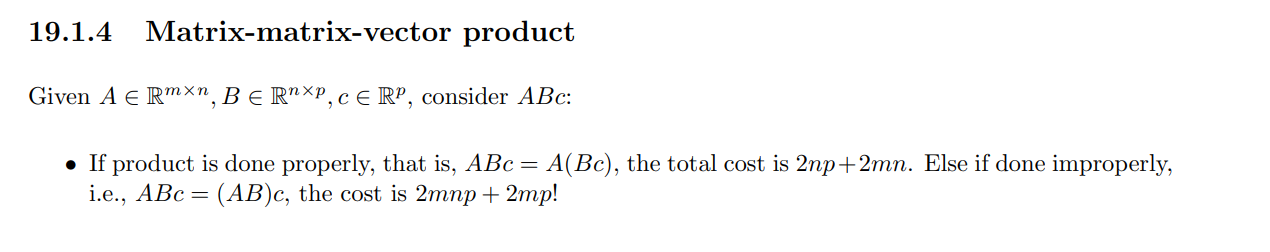

In [ ]:
import numpy as np

# A - mxn
# B - nxp
# c - p

m = 10
n = 7
p = 4

k = 3
l = 8

A = np.random.randint(0, 3, (m, n))
B = np.random.randint(0, 3, (n, p))
c = np.random.randint(0, 3, p)

D = np.random.randint(0, 3, (m, k))
E = np.random.randint(0, 3, (k, l))
F = np.random.randint(0, 3, (l, p))
g = np.random.randint(0, 3, p)

In [ ]:
ABc = 2*m*n*p + 2*m*p

A_Bc = (2*p-1)*n + (2*n-1)*m

print(f'ABc FLOPS result: {ABc}')
print(f'A(Bc) FLOPS result: {A_Bc}')

ABc FLOPS result: 640
A(Bc) FLOPS result: 179


In [ ]:
F_g = (2*p-1)*l
E_Fg = (2*l-1)*k
D_EFg = (2*m-1)*k

print(f'FLOPS для умножения матрицы F и и вектора g: {F_g}')
print(f'FLOPS для умножения матрицы E и вектора F_g: {E_Fg}')
print(f'FLOPS для умножения матрицы D и вектора E_Fg: {D_EFg}')

print(f'Итого: {F_g + E_Fg + D_EFg}')

FLOPS для умножения матрицы F и и вектора g: 56
FLOPS для умножения матрицы E и вектора F_g: 45
FLOPS для умножения матрицы D и вектора E_Fg: 57
Итого: 158


In [ ]:
A_Bc + F_g + E_Fg + D_EFg + 10

347

## Начнем с первого слагаемого $ABc$

In [ ]:
A@B # матрица * матрица = матрица размерности mxp (10x4)

array([[ 6,  4,  3,  7],
       [ 3,  1,  2,  1],
       [ 9,  6,  5,  7],
       [ 9,  6,  3,  6],
       [ 6,  6,  4,  6],
       [ 7,  6,  4,  5],
       [12,  7,  7,  9],
       [ 8,  6,  4,  6],
       [ 4,  4,  4,  6],
       [ 4,  3,  3,  5]])

In [ ]:
B@c # матрица * вектор = вектор размерности n=7

array([4, 0, 4, 8, 5, 5, 2])

In [ ]:
c@A # матрица * вектор = вектор размерности n=7

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 4)

1. Число операций для умножения матрицы $𝐵$ на вектор $𝑐$ составляет $n×p$.

А требуемое число $FLOPS$: $2×n×p=2×7×4=56FLOPS$.

2. Если начать с операции умножения матриц $AxB$, то получится, что требуется $m×n×p$ операций умножения и сложения (по количеству элементов в строках $A$ и столбцах $B$, которые нужно перемножить).

То есть для вычисления $AxB$ требуется: $2×m×n×p=10×7×4=640FLOPS$.

Потому что, у нас 280 операций умножений, и 280 операций сложения.

Поэтому в этом случае рациональнее начать выполнять операции в последовательности: $A*(B*c)$.

In [ ]:
def matrix_multiplication(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    count_prod = 0
    count_sum = -1

    result = [[0 for row in range(cols_B)] for col in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                mults = A[i][k] * B[k][j] # операция умножения
                result[i][j] = result[i][j] + mults # операция сложения
                count_prod += 1
                count_sum += 1

    print(f'Кол-во операций умножения: {count_prod}, \nКол-во операций сложения: {count_sum}')
    print(f'Итого количество операций умножения матрицы на матрицу: {count_prod+count_sum}')
    return result

def matrix_vector_multiplication(matrix, vector):
    count_prod = 0
    count_sum = -1

    if len(matrix[0]) != len(vector):
        raise ValueError("Число столбцов матрицы должно совпадать с размером вектора.")

    result = [0] * len(matrix)

    for i in range(len(matrix)):
        for j in range(len(vector)):
            mult = matrix[i][j] * vector[j]
            result[i] = result[i] + mult
            count_prod += 1
            count_sum += 1
    print(f'Кол-во операций умножения: {count_prod}, \nКол-во операций сложения: {count_sum}')
    print(f'Итого количество операций умножения матрицы на матрицу: {count_prod+count_sum}')

    return result

In [ ]:
matrix_multiplication(A, B)

Кол-во операций умножения: 280, 
Кол-во операций сложения: 280
Итого количество операций умножения матрицы на матрицу: 560


[[8, 7, 9, 7],
 [9, 6, 6, 4],
 [4, 6, 3, 5],
 [11, 3, 2, 4],
 [6, 1, 2, 1],
 [14, 5, 8, 8],
 [6, 8, 6, 7],
 [11, 7, 8, 11],
 [6, 3, 4, 3],
 [14, 8, 6, 10]]

In [ ]:
matrix_vector_multiplication(B, c)

Кол-во операций умножения: 28, 
Кол-во операций сложения: 27
Итого количество операций умножения матрицы на матрицу: 55


[1, 2, 2, 0, 2, 2, 1]

In [ ]:
B@c # матрица * вектор = вектор размерности n = 7

array([4, 0, 4, 8, 5, 5, 2])

In [ ]:
Bc = B@c # # матрица * вектор = вектор размерности n = 7

A @ Bc # вектор размерности m = 10

array([13,  9, 11,  9,  9, 15, 10,  8,  6, 10])

In [ ]:
matrix_vector_multiplication(A, Bc)

Кол-во операций умножения: 70, 
Кол-во операций сложения: 69
Итого количество операций умножения матрицы на матрицу: 139


[13, 9, 11, 9, 9, 15, 10, 8, 6, 10]

Результат — вектор размерности $m$.

Число операций для умножения матрицы $A$ на вектор $Bc$ составляет $2×m×n$.

Подсчитаем:

$2×m×n=2×10×7=140FLOPS$.

**Таким образом, общее количество операций для вычисления $ABc$ составляет:**

$56+140=196FLOPS$.

Что подтверждается теоритическим рассчетом в самом начале.

**Хотя результат будет один и тот же, но с точки зрения производительности результат другой**

In [ ]:
%%time

A @ B @ c # 640 FLOPS

CPU times: user 111 µs, sys: 0 ns, total: 111 µs
Wall time: 117 µs


array([15, 13,  9, 15,  7, 22, 13, 22,  9, 24])

In [ ]:
%%time

A @ (B @ c) # 196 FLOPS

CPU times: user 51 µs, sys: 0 ns, total: 51 µs
Wall time: 55.6 µs


array([15, 13,  9, 15,  7, 22, 13, 22,  9, 24])

## Теперь посмотрим на второе слагаемое $DEFg$

In [ ]:
D @ E @ F @ g

array([ 31, 180, 278, 108, 121, 129,  31, 180,  31,  49])

In [ ]:
D @ E @ (F @ g)

array([ 31, 180, 278, 108, 121, 129,  31, 180,  31,  49])

**Теоритический рассчет**

In [ ]:
# первый вариант DEFg
# т.е. сначала матрица D (mxk) умножается на матрицу E (kxl) = DE матрица mxl = (10, 8)
# потом полученная матрица DE (mxl) умножается на матрицу F (lxp) = DEF матрица mxp (10,4)
# далее полученная матрица DEF (mxp) умножается на вектор g (p) = вектор размера  m

In [ ]:
D_E = 2*m*k*l
DE_F = 2*m*l*p
DEF_g = 2*m*p

print(f'FLOPS для умножения матриц D и E: {D_E}')
print(f'FLOPS для умножения матриц DE и F: {DE_F}')
print(f'FLOPS для умножения матрицы DEF и вектора g: {DEF_g}')

print(f'Итого: {D_E + DE_F + DEF_g}')

FLOPS для умножения матриц D и E: 480
FLOPS для умножения матриц DE и F: 640
FLOPS для умножения матрицы DEF и вектора g: 80
Итого: 1200


In [ ]:
# второй вариант DE(Fg)

# т.е. сначала матрица F (lxp) умножается на вектор g (p) = вектор размера l = 8
# потом матрица E (kxl) умножается на полученный вектор Fg (l) = вектор E(Fg) размера k = 3
# далее матрица D (mxk) умножается на полученный вектор E(Fg) размера k = вектор размера m = 10

In [ ]:
F_g = 2*l*p
E_Fg = 2*k*l
D_EFg = 2*m*k

print(f'FLOPS для умножения матрицы F и и вектора g: {F_g}')
print(f'FLOPS для умножения матрицы E и вектора F_g: {E_Fg}')
print(f'FLOPS для умножения матрицы D и вектора E_Fg: {D_EFg}')

print(f'Итого: {F_g + E_Fg + D_EFg}')

FLOPS для умножения матрицы F и и вектора g: 64
FLOPS для умножения матрицы E и вектора F_g: 48
FLOPS для умножения матрицы D и вектора E_Fg: 60
Итого: 172


1. Перемножение матриц $D$ и $E$ дает матрицу размерности $m×l$. Для перемножения матриц требуется $m×k×l$ операций умножения и сложения: $m×k×l=10×3×8=240FLOPS$.

2. Следующим шагом перемножаем результат $DE$ на матрицу $F$, получая матрицу размерности $m×p$. Для перемножения матриц $DE$ и $F$ требуется $m×l×p$ операций: $m×l×p=10×8×4=320FLOPS$.

3. Наконец, умножаем полученную матрицу $DEF$ на вектор $g$, что дает вектор размерности $m$. Для умножения матрицы $DEF$ на вектор $g$ требуется $m×p$ операций: $m×p=10×4=40FLOPS$.

In [ ]:
D @ E # матрица * матрица = матрица mxl (10x8)

array([[3, 1, 2, 3, 2, 3, 1, 3],
       [3, 2, 0, 1, 0, 4, 2, 2],
       [4, 2, 4, 4, 4, 2, 2, 2],
       [2, 0, 0, 2, 0, 4, 0, 4],
       [1, 0, 0, 1, 0, 2, 0, 2],
       [3, 1, 2, 3, 2, 3, 1, 3],
       [5, 2, 4, 5, 4, 4, 2, 4],
       [3, 2, 0, 1, 0, 4, 2, 2],
       [2, 0, 0, 2, 0, 4, 0, 4],
       [4, 2, 4, 4, 4, 2, 2, 2]])

In [ ]:
matrix_multiplication(D, E) # 480 Flops

Кол-во операций умножения: 240, 
Кол-во операций сложения: 240
Итого количество операций умножения матрицы на матрицу: 480


[[3, 1, 2, 3, 2, 3, 1, 3],
 [3, 2, 0, 1, 0, 4, 2, 2],
 [4, 2, 4, 4, 4, 2, 2, 2],
 [2, 0, 0, 2, 0, 4, 0, 4],
 [1, 0, 0, 1, 0, 2, 0, 2],
 [3, 1, 2, 3, 2, 3, 1, 3],
 [5, 2, 4, 5, 4, 4, 2, 4],
 [3, 2, 0, 1, 0, 4, 2, 2],
 [2, 0, 0, 2, 0, 4, 0, 4],
 [4, 2, 4, 4, 4, 2, 2, 2]]

In [ ]:
F @ g # матрица * вектор = вектор размерности l = 8

array([0, 0, 2, 0, 2, 2, 1, 0])

In [ ]:
matrix_vector_multiplication(F, g) # 64 FLOPS

Кол-во операций умножения: 32, 
Кол-во операций сложения: 31
Итого количество операций умножения матрицы на матрицу: 63


[3, 3, 3, 4, 4, 1, 2, 5]

In [ ]:
Fg = matrix_vector_multiplication(F, g) # 64 FLOPS

print('__________________________________________________')

EFg = matrix_vector_multiplication(E, Fg) # 48 FLOPS

print('__________________________________________________')

DEFg = matrix_vector_multiplication(D, EFg) # 60 FLOPS

Кол-во операций умножения: 32, 
Кол-во операций сложения: 31
Итого количество операций умножения матрицы на матрицу: 63
__________________________________________________
Кол-во операций умножения: 24, 
Кол-во операций сложения: 23
Итого количество операций умножения матрицы на матрицу: 47
__________________________________________________
Кол-во операций умножения: 30, 
Кол-во операций сложения: 29
Итого количество операций умножения матрицы на матрицу: 59


Итак, общее количество операций для вычисления $DE(Fg)$ составляет:
$64+48+60=172FLOPS$.

Тогда как операция $DEFg$ требует:

$480+640+80=1200FLOPS$.

## Сложение результатов перемножения матриц и векторов

После того как оба выражения $ABc$ и $DEFg$ вычислены, их нужно сложить. Сложение двух векторов размерности $m$ требует $m$ операций.

In [ ]:
%time
ABc = A @ B @ c
DEFg = D @ E @ F @ g

ABc + DEFg

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


array([30, 23, 31, 23, 11, 37, 39, 32, 17, 46])

In [ ]:
%time
ABc = A @ (B @ c)
DEFg = D @ E @ (F @ g)

ABc + DEFg

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


array([30, 23, 31, 23, 11, 37, 39, 32, 17, 46])

In [ ]:
%%time
res = []
count_operations = 0

for i in range(m):
    res.append(ABc[i] + DEFg[i])
    count_operations += 1

print(res)
print(f'Количество операций сложений: {count_operations}')

[30, 23, 31, 23, 11, 37, 39, 32, 17, 46]
Количество операций сложений: 10
CPU times: user 234 µs, sys: 0 ns, total: 234 µs
Wall time: 241 µs


**Итого:**

1. Общее количество операций для вычисления $A(Bc)$ составляет: $196FLOPS$.

2. Общее количество операций для вычисления $D(E(Fg))$ составляет: $172FLOPS$.

2. Общее количество операций для вычисления $A(Bc) + D(E(Fg))$ составляет: $10FLOPS$.

$196 + 172 + 10 = 378$

# 4. Вычислить ROC-AUC (5)

Вася обучил модель логистической регрессии для задачи бинарной классификации данных, состоящих из двух признаков. На картинке нарисована разделяющая прямая, получившаяся у Васи, а также изображены точки валидационной выборки.

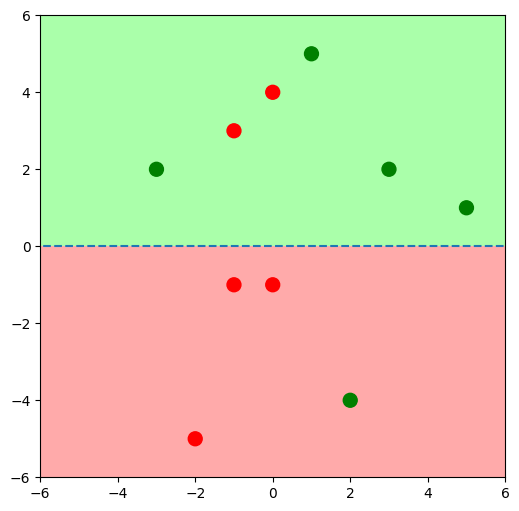

В зелёной области классификатор относит объект к классу "1", в красной — к классу "0". Зелёные точки соответствуют объектам, которые относятся к классу 1, красные — к классу 0.

Вычислите значение метрики $ROC-AUC$ на валидационной выборке.

**Формат вывода**

Введите одну десятичную дробь — значение метрики $ROC-AUC$, округлённое до 3 знаков после запятой.

**Примечания**

Точные координаты всех точек:

```
[(0, -1), (-2, -5), (0, 4), (1, 5), (3, 2), (-3, 2), (-1, -1), (2, -4), (-1, 3), (5, 1)].
```

Лейблы (истинные классы) объектов в том же порядке:

```
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1].
```

Решающее правило имеет вид $[x_2>0]$, где $x_2$  — значение признака, отложенный по оси ординат.

## Давайте вообще разберемся в терминах

Советую почитать: https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii

Тут очень подробно и детально про все написано.

## Теперь переходим к решению

In [ ]:
y = [0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
y_pred = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
dots = [(0, -1), (-2, -5), (0, 4), (1, 5), (3, 2), (-3, 2), (-1, -1), (2, -4), (-1, 3), (5, 1)]

print(len(y))
print(len(y_pred))
print(len(dots))

10
10
10


In [ ]:
# Предсказанные классы на основе правила [x2 > 0]
predicted_labels = [1 if y > 0 else 0 for _, y in coordinates]

predicted_labels

[0, 0, 1, 1, 1, 1, 0, 0, 1, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(true_labels, predicted_labels)
roc_auc = round(roc_auc, 3)
roc_auc

0.7

<Axes: >

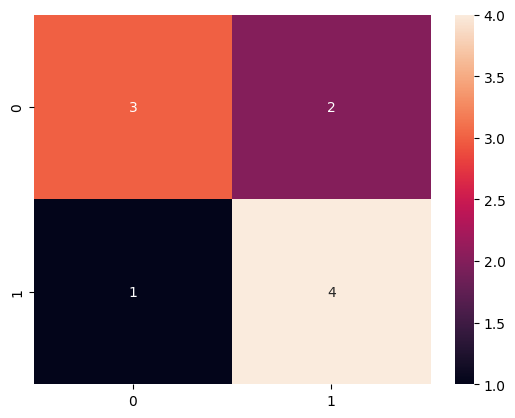

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

sn.heatmap(conf_mat, annot=True)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

tpr = tp / ( tp + fn )
fpr = fp / ( fp + tn )

print(f'TPR: {tpr}')
print(f'FPR: {fpr}')

TPR: 0.8
FPR: 0.4


# 4. Вычислить F1 (5)

Вася обучил модель логистической регрессии для задачи бинарной классификации данных, состоящих из двух признаков. На картинке нарисована разделяющая прямая, получившаяся у Васи, а также изображены точки валидационной выборки.

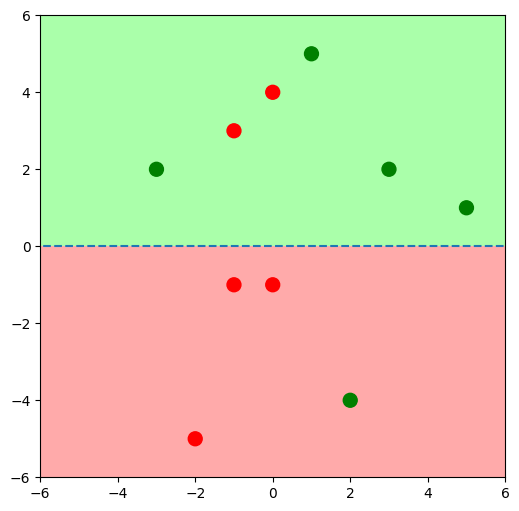

В зелёной области классификатор относит объект к классу "1", в красной — к классу "0". Зелёные точки соответствуют объектам, которые относятся к классу 1, красные — к классу 0.

Вычислите значение метрики $F_{1_score}$ на валидационной выборке.

**Формат вывода**

Введите одну десятичную дробь — значение метрики $F_{1_score}$, округлённое до 3 знаков после запятой.

**Примечания**

Точные координаты всех точек:

```
[(0, -1), (-2, -5), (0, 4), (1, 5), (3, 2), (-3, 2), (-1, -1), (2, -4), (-1, 3), (5, 1)].
```

Лейблы (истинные классы) объектов в том же порядке:

```
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1].
```

Решающее правило имеет вид $[x_2>0]$, где $x_2$  — значение признака, отложенный по оси ординат.

$TP = 4$

$TN = 3$

$FN = 1$

$FP = 2$


$Precision = \frac{TP}{TP+FP}=\frac{4}{4+2}=\frac{2}{3}$

$Recall = \frac{TP}{TP+FN}=\frac{4}{4+1}=\frac{4}{5}$

$F_1score=\frac{2*Precision*Recall}{Precision+Recall}=\frac{2*\frac{2}{3}*\frac{4}{5}}{\frac{2}{3}+\frac{4}{5}}=\frac{16}{22}$

In [ ]:
round(16/22, 3)

0.727

# 5. Короткий k-means (5)

У Юры есть датасет, содержащий $15$ объектов и $2$ признака, причём точки, соответствующие объектам, являются вершинами правильного $15$-угольника. Юра тестирует на этом датасете алгоритм $k-means$(количество кластеров $k=3$, стандартная евклидова метрика на плоскости), состоящий из следующих шагов.

Из точек датасета случайно выбираются $3$ точки $C_1, C_2, C_3$ – изначальные центры кластеров.

Пока разбиение на кластеры не стабилизируется:
- (E-шаг) Каждая точка $A$ датасета относится к кластеру, который соответствует ближайшему центру: значение кластера равно значению $k$, для которого величина $||A−C_k||$ минимальна.

- (M-шаг) Центром $C_k$ каждого кластера назначается центр масс точек данного кластера.

Юра не терпит неопределенностей и не хочет долго ждать, поэтому ему хочется, чтобы выполнялось два условия.

- При первом выполнении E-шага каждая точка однозначно отнесётся к ближайшему центру: ни для одной точки $A$ из датасета не будет двух центров кластеров на одном и том же минимальном расстоянии от $A$.

- Кластеризация после второго выполнение E-шага полностью совпадёт с кластеризацией после первого выполнения Е-шага, и алгоритм завершится.

Найдите вероятность того, что при случайной инициализации центров кластеров эти два условия будут выполнены.

**Формат вывода**

Выведите искомую вероятность в виде несократимой дроби.

**Примечания**
Пример корректного вывода : $20∕23$.


## Обсуждение

1. Для начала что такое **кластеризация** и  **kmeans**.

Кластерный анализ, или кластеризация, — это метод ML без учителя (т.е. нет ответов), который подразумевает разделение объектов на некоторые группы. Каждая группа называется кластером. Кластер формируется на основе какого-то конкретного критерия. Это может быть любая особенность объекта: размер, форма, категория, вид. Внутри одного кластера объекты могут различаться по другим критериям, но хотя бы по одному они должны быть схожи.

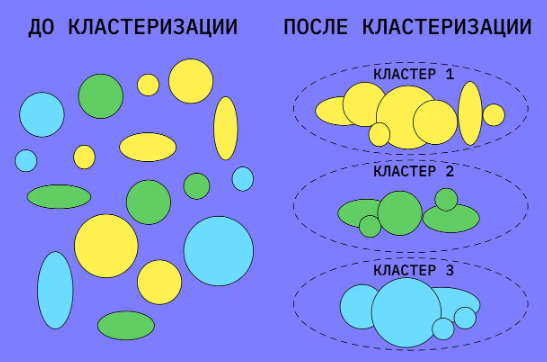

2. Теперь про данные, которые у нас есть.

- Нам сказано, что у нас всего 2 признака, значит у нас двух мерное пространство (ось X и ось Y).

- Также мы знаем, что у нас всего 15 объектов, которые являются вершинами правильного 15-тиугольника.

- Так же сказано, что мы должны разбить наши объекты на 3 кластера.

## Стабилизация решения

- **Условие 1**: Однозначная кластеризация

Для того чтобы в первом $E$-шаге не было неопределенности (то есть, чтобы каждая точка однозначно относилась к одному кластеру), центры кластеров не должны лежать на одной прямой. Это условие выполняется, если центры кластеров выбираются таким образом, что между ними нет точек, находящихся на одинаковом расстоянии от двух центров.

**Как выбрать центры:**

Пусть точки на правильном $15$-угольнике имеют угловые координаты: $0, 24, 48,...,336$. Чтобы между центрами не было неопределенности, они должны быть расположены на разных угловых расстояниях и, желательно, на угловых расстояниях, которые обеспечивают "достаточную" удаленность.

Для выполнения первого условия, центры должны быть расположены так, чтобы между ними было не менее 5 точек. Это гарантирует, что каждый центр будет иметь несколько ближайших точек, а не одинаковое расстояние от двух или более точек.

- **Условие 2**: Стабильность кластеризации

После второго $E$-шага кластеризация должна совпасть с кластеризацией после первого $E$-шага. Это условие выполняется, если центры кластеров, после того как будут обновлены в $M$-шаге, не изменят своего положения. Чтобы это происходило, важно, чтобы центры кластеров были расположены на таких угловых расстояниях, чтобы после первого шага обновления центров кластеров не изменяли их положение. Это также требует, чтобы центры кластеров делили углы равномерно.

## Рассчет

1. Мы должны выбрать 3 точки из 15. Воспользуемся формулой **сочетаний** $С = \frac{n!}{k! * (n - k)!}$, где $n$ - число всех точек, k - число точек, которые нам требуется выбрать.

Количество способов выбрать 3 точки из 15 равно:

$$
\frac{15*13*14}{3*2*1} = 455
$$

In [ ]:
import math

C = math.factorial(15) / (math.factorial(3) * math.factorial(12))
C

455.0

Теперь, чтобы соблюсти оба условия, центры должны быть расположены так, чтобы они делили окружность на три равные части, то есть между ними должно быть одинаковое количество точек. Это возможно только в следующих случаях:

Центры могут быть расположены через 5 точек друг от друга, что означает угловые расстояния в $5×24 = 120$ между центрами.

Поскольку можно выбрать любые 3 точки, которые будут расположены через 5 точек друг от друга (при этом начиная с любой из 15 точек), существует только 3 таких способа (так как круг симметричен).

# 7. Новая колода для профессора Трелони (7)

Профессору Трелони надоело, что ее предсказания обычно негативные, поэтому она решила попробовать гадать на недавно появившейся новинке — Численных Картах Таро. Чтобы ее прогнозы были как можно более позитивными, она хочет выбрать для этого самую подходящую колоду. Однако она совершенно не понимает, какую следует взять, поэтому профессор Трелони обратилась за помощью к вам.

Известно, что гадание на Численных Картах Таро выглядит следующим образом. Каждая карта соответствует некоторому целому числу в диапазоне от $1$ до $M (1 <= M <= 50 000)$.

При этом значения карт в одной колоде могут повторяться.

Профессор Трелони три раза проделывает следующий трюк.

Она вытягивает случайную карту из колоды, а потом записывает ее значение в блокнот для предсказаний. Потом, чтобы не испортить магические свойства колоды, она возвращает карту обратно. После того, как профессор выпишет три числа, она делает свое предсказание, основываясь на сумме наибольшего и наименьшего из них.

Известно, что чем больше сумма, тем лучше получается предсказание, поэтому вам необходимо найти колоду, у которой математическое ожидание этой величины будет наибольшим.

**Формат ввода**

Первая строка содержит число $N (0 <N ≤ 20)$ — количество колод. На следующих $2n$ строках вводятся сами колоды. На строчке с номером $2k$ написано натуральное число $n_k (0<n_k≤100000)$ — размер колоды с номером $k$. На строчке с номером $2k+1$ через пробел вводятся $n_k$ чисел — сами карты.

Карты в колоде не отсортированы (могут идти в произвольном порядке).

**Формат вывода**

Необходимо вывести два числа через пробел — номер колоды, которая лучше всего подойдет профессору Трелони и математическое ожидание для нее (с точностью до $10^{-4}$).

Если таких несколько, выведите колоду с наименьшим номером.

In [ ]:
n = int(input()) # количество колод

all_cards = []
# теперь считаем колоды
for i in range(n):
    cards_size = int(input())
    cards = list(map(int, input().split()))
    all_cards.append((cards_size, cards))

# 2
# 8
# 1 2 2 3 3 3 3 4
# 5
# 1 1 4 5 6

2
8
1 2 2 3 3 3 3 4
5
1 1 4 5 6


In [ ]:
all_cards

[(8, [1, 2, 2, 3, 3, 3, 3, 4]), (5, [1, 1, 4, 5, 6])]

Она вытягивает случайную карту из колоды, а потом записывает ее значение в блокнот для предсказаний. Потом, чтобы не испортить магические свойства колоды, она возвращает карту обратно. После того, как профессор выпишет три числа, она делает свое предсказание, основываясь на сумме наибольшего и наименьшего из них.

Известно, что чем больше сумма, тем лучше получается предсказание, поэтому вам необходимо найти колоду, у которой математическое ожидание этой величины будет наибольшим.

In [ ]:
from itertools import product, combinations_with_replacement

# для одной итерации вытаскивания трех карт

koloda = [1, 1, 4, 5, 6]

all_poss_get = list(product(koloda, koloda, koloda))

# пример для трех вариантов
for comb in all_poss_get[:3]:
    print("Одна из возможных комбинаций достать 3 карты", comb)
    min_val = min(comb)
    max_val = max(comb)
    print(f'Минимальный элемент этой позиции: {min_val}')
    print(f'Максимальный элемент этой позиции: {max_val}')
    print(f'Сумма минимального и максимального: {min_val+max_val}')
    print('________________________')

Одна из возможных комбинаций достать 3 карты (1, 1, 1)
Минимальный элемент этой позиции: 1
Максимальный элемент этой позиции: 1
Сумма минимального и максимального: 2
________________________
Одна из возможных комбинаций достать 3 карты (1, 1, 1)
Минимальный элемент этой позиции: 1
Максимальный элемент этой позиции: 1
Сумма минимального и максимального: 2
________________________
Одна из возможных комбинаций достать 3 карты (1, 1, 4)
Минимальный элемент этой позиции: 1
Максимальный элемент этой позиции: 4
Сумма минимального и максимального: 5
________________________


In [ ]:
koloda = [1, 1, 4, 5, 6]

all_poss_get = list(product(koloda, koloda, koloda))

for event in all_poss_get:
    event_sum.append(min(event) + max(event))

In [ ]:
# пример для трех вариантов

for comb in all_poss_get[:3]:
    print("Одна из возможных комбинаций достать 3 карты", comb)
    min_val = min(comb)
    max_val = max(comb)
    print(f'Минимальный элемент этой позиции: {min_val}')
    print(f'Максимальный элемент этой позиции: {max_val}')
    print(f'Сумма минимального и максимального: {min_val+max_val}')
    print('________________________')

Одна из возможных комбинаций достать 3 карты (1, 1, 1)
Минимальный элемент этой позиции: 1
Максимальный элемент этой позиции: 1
Сумма минимального и максимального: 2
________________________
Одна из возможных комбинаций достать 3 карты (1, 1, 1)
Минимальный элемент этой позиции: 1
Максимальный элемент этой позиции: 1
Сумма минимального и максимального: 2
________________________
Одна из возможных комбинаций достать 3 карты (1, 1, 4)
Минимальный элемент этой позиции: 1
Максимальный элемент этой позиции: 4
Сумма минимального и максимального: 5
________________________


In [ ]:
from itertools import product

n = int(input()) # количество колод

all_cards = []
# теперь считаем колоды
for i in range(n):
    cards_size = int(input())
    cards = list(map(int, input().split()))
    all_cards.append((cards_size, cards))

# [(8, [1, 2, 2, 3, 3, 3, 3, 4]), (5, [1, 1, 4, 5, 6])]

max_expectation = 0
ans = 0

for i in range(len(all_cards)):

    koloda = all_cards[i]

    all_poss_get = list(product(koloda[1], koloda[1], koloda[1]))

    all_poss_get = np.array(all_poss_get)
    total_sum = all_poss_get.max(axis=1) + all_poss_get.min(axis=1)
    total_sum = total_sum.sum()

    # total_sum = 0
    # for event in all_poss_get:
    #     total_sum += min(event) + max(event)

    if total_sum / len(all_poss_get) > max_expectation:
        max_expectation = total_sum / len(all_poss_get)
        ans = i

print(f'{ans+1} {max_expectation:.4f}')

2
8
1 2 2 3 3 3 3 4
5
1 1 4 5 6
2 6.8000


## Итоговое полное решение

In [ ]:
import numpy as np

n = int(input())

all_cards = []

for i in range(n):
    cards_size = int(input())
    cards = list(map(int, input().split()))
    all_cards.append((cards_size, cards))

max_expectation, ans = 0, 0

for deck_index, (deck_size, cards) in enumerate(all_cards):
    # print(f'Текущая колода: {deck_index}')
    # print(f'Размер колоды: {deck_size}')
    # print(f'Карты: {cards}')
    cards = np.array(cards)
    sorted_cards = np.sort(cards)
    reversed_cards = sorted_cards[::-1]

    indices = np.array(range(deck_size))
    # print(indices)
    weights = ((indices + 1) ** 3 - indices ** 3) / deck_size ** 3
    # print(weights)
    expected_max = np.sum(sorted_cards * weights)
    # print(expected_max)
    expected_min = np.sum(reversed_cards * weights)
    # print(expected_min)

    expectation = expected_min + expected_max

    if expectation > max_expectation:
        max_expectation, ans = expectation, deck_index + 1

print(f'{ans} {max_expectation:.4f}')
# 1
# 5
# 1 1 4 5 6
# # 1 6.8000

# 8
# 1 2 2 3 3 3 3 4
# 1 5.1914

# 1
# 3
# 1 5 2
# 1 5.4815

# 1
# 4
# 1 3 2 3
# 1 4.4062

1
4
1 3 2 3
1 4.4062


# 12. Восстановление векторного поля (10)

В этой задаче вам необходимо восстановить поле, которое образуется в результате продувки в аэродинамической трубе.

**Формат ввода**

Данные доступны по [ссылке](https://disk.yandex.ru/d/OcgwfQExmUjVdA). Вам задан набор данных (`train.csv`), состоящий из следующих полей:
- $x, y, z$ — координаты точки в пространстве;
- $u_x, u_y, u_z$ — вектор скорости потока в данной точке;
- $p$ — давление в данной точке.

Набор данных `test.csv` содержит только координаты $(x,y,z)$.

**Формат вывода**

Вам необходимо послать в тестирующую систему файл `submission.csv`, $k$-я строка которого будет содержать предсказанные значения $u_x, u_y, u_z, p$ для $k$-ой строки файла `test.csv`.

Предсказанные таргеты в каждой строке разделяются запятыми. Нулевая строка должна содержать название колонок (игнорируются при чтении).

Файл `sample_submission.csv` представляет из себя пример посылки.

## Пояснение

Во-первых, давайте разберемся с каким типо задачи ML мы имеем дело.

**Задача регрессии** — это тип задачи в машинном обучении, где мы хотим научиться предсказывать числовое значение на основе входных данных.

Например, представьте, что мы хотим спрогнозировать:
- цену дома на основе его характеристик (площади, количества комнат, местоположения),
- температуру на завтра на основе данных о погоде,
количество просмотров статьи, основываясь на ее содержании.

В задаче регрессии модель учится находить зависимости между входными данными (набором характеристик - $X$) и выходом (целевым значением - $Y$).

После обучения модель может принимать новые данные и выдавать прогнозируемое значение, которое, по её "мнению", максимально близко к реальному ответу.

Регрессия работает с **непрерывными числовыми значениями**. Это значит, что ответы (или предсказания), которые модель регрессии выдает, могут быть любыми числами в определенном диапазоне, а не ограниченным набором категорий.

В отличие от регрессии, в задаче классификации ответом обычно является один из нескольких фиксированных классов или категорий, например, «да» или «нет», или «красный», «синий» или «зеленый», т.е. ответ в классификациях является **дискретным**.

## Загрузка данных

In [ ]:
# Монтирует google disk в colab
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

url = os.chdir(r"/content/gdrive/MyDrive/Я-профи/ДемоВерсия ИИ 2024")
os.getcwd()

'/content/gdrive/MyDrive/Я-профи/ДемоВерсия ИИ 2024'

In [ ]:
os.listdir('./Восстановление векторного поля (магистратура)')

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'catboost_info',
 'submission.csv']

In [ ]:
os.chdir(r"/content/gdrive/MyDrive/Я-профи/ДемоВерсия ИИ 2024/Восстановление векторного поля (магистратура)")

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(8532, 7)
(3656, 3)
(3656, 4)


In [ ]:
train.head()

,x,y,z,u_x,u_y,u_z,p
0,-2.182809,-0.029668,-4.177883,410.436506,0.013901,-0.054928,100030.436265
1,-5.697199,-1.168055,2.704167,410.437352,-0.030757,0.021365,100020.971632
2,-2.388080,0.489320,-4.422072,410.443844,0.028441,-0.042093,100021.156537
3,-6.859628,0.177311,-1.745587,410.430337,0.008494,-0.011427,100018.526121
4,2.668538,-0.702350,3.033114,417.831936,-0.717926,0.116151,97710.352064


In [ ]:
test.head()

,x,y,z
0,12.595389,-0.676479,9.448017
1,-5.115985,0.332546,-1.952567
2,-2.182809,-0.133158,4.463463
3,2.233563,-0.857583,-3.054615
4,-0.847552,-0.185422,-1.177141


In [ ]:
sample_submission.head()

,u_x,u_y,u_z,p
0,410.450001,-0.000002,0.000002,100000.084827
1,410.450001,-0.000002,0.000002,100000.084827
2,410.450001,-0.000002,0.000002,100000.084827
3,410.450001,-0.000002,0.000002,100000.084827
4,410.450001,-0.000002,0.000002,100000.084827


## Небольшое исследование данных

In [ ]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(8532, 7)
(3656, 3)
(3656, 4)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       8532 non-null   float64
 1   y       8532 non-null   float64
 2   z       8532 non-null   float64
 3   u_x     8532 non-null   float64
 4   u_y     8532 non-null   float64
 5   u_z     8532 non-null   float64
 6   p       8532 non-null   float64
dtypes: float64(7)
memory usage: 466.7 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3656 non-null   float64
 1   y       3656 non-null   float64
 2   z       3656 non-null   float64
dtypes: float64(3)
memory usage: 85.8 KB


In [ ]:
train.describe()

,x,y,z,u_x,u_y,u_z,p
count,8532.000000,8532.000000,8532.000000,8532.000000,8.532000e+03,8532.000000,8532.000000
mean,-0.254667,-0.350672,-0.290869,409.892381,7.590064e-02,-0.004658,100118.491535
std,6.472389,1.603381,4.108288,8.133379,7.924192e+00,6.084416,4189.512399
min,-57.962438,-29.859253,-27.749730,304.361458,-8.208936e+01,-78.584974,68736.397738
25%,-4.728509,-0.857039,-3.103452,409.452440,-6.920104e-02,-0.313330,99999.990880
50%,-0.433942,-0.289558,-0.294133,410.430729,5.125650e-08,-0.000003,100022.822849
75%,4.299156,0.177311,2.539692,410.449983,6.177531e-02,0.243971,100842.952279
max,55.590128,27.389707,27.795327,454.716217,8.533808e+01,83.416506,161324.075782


## Подготовка данных

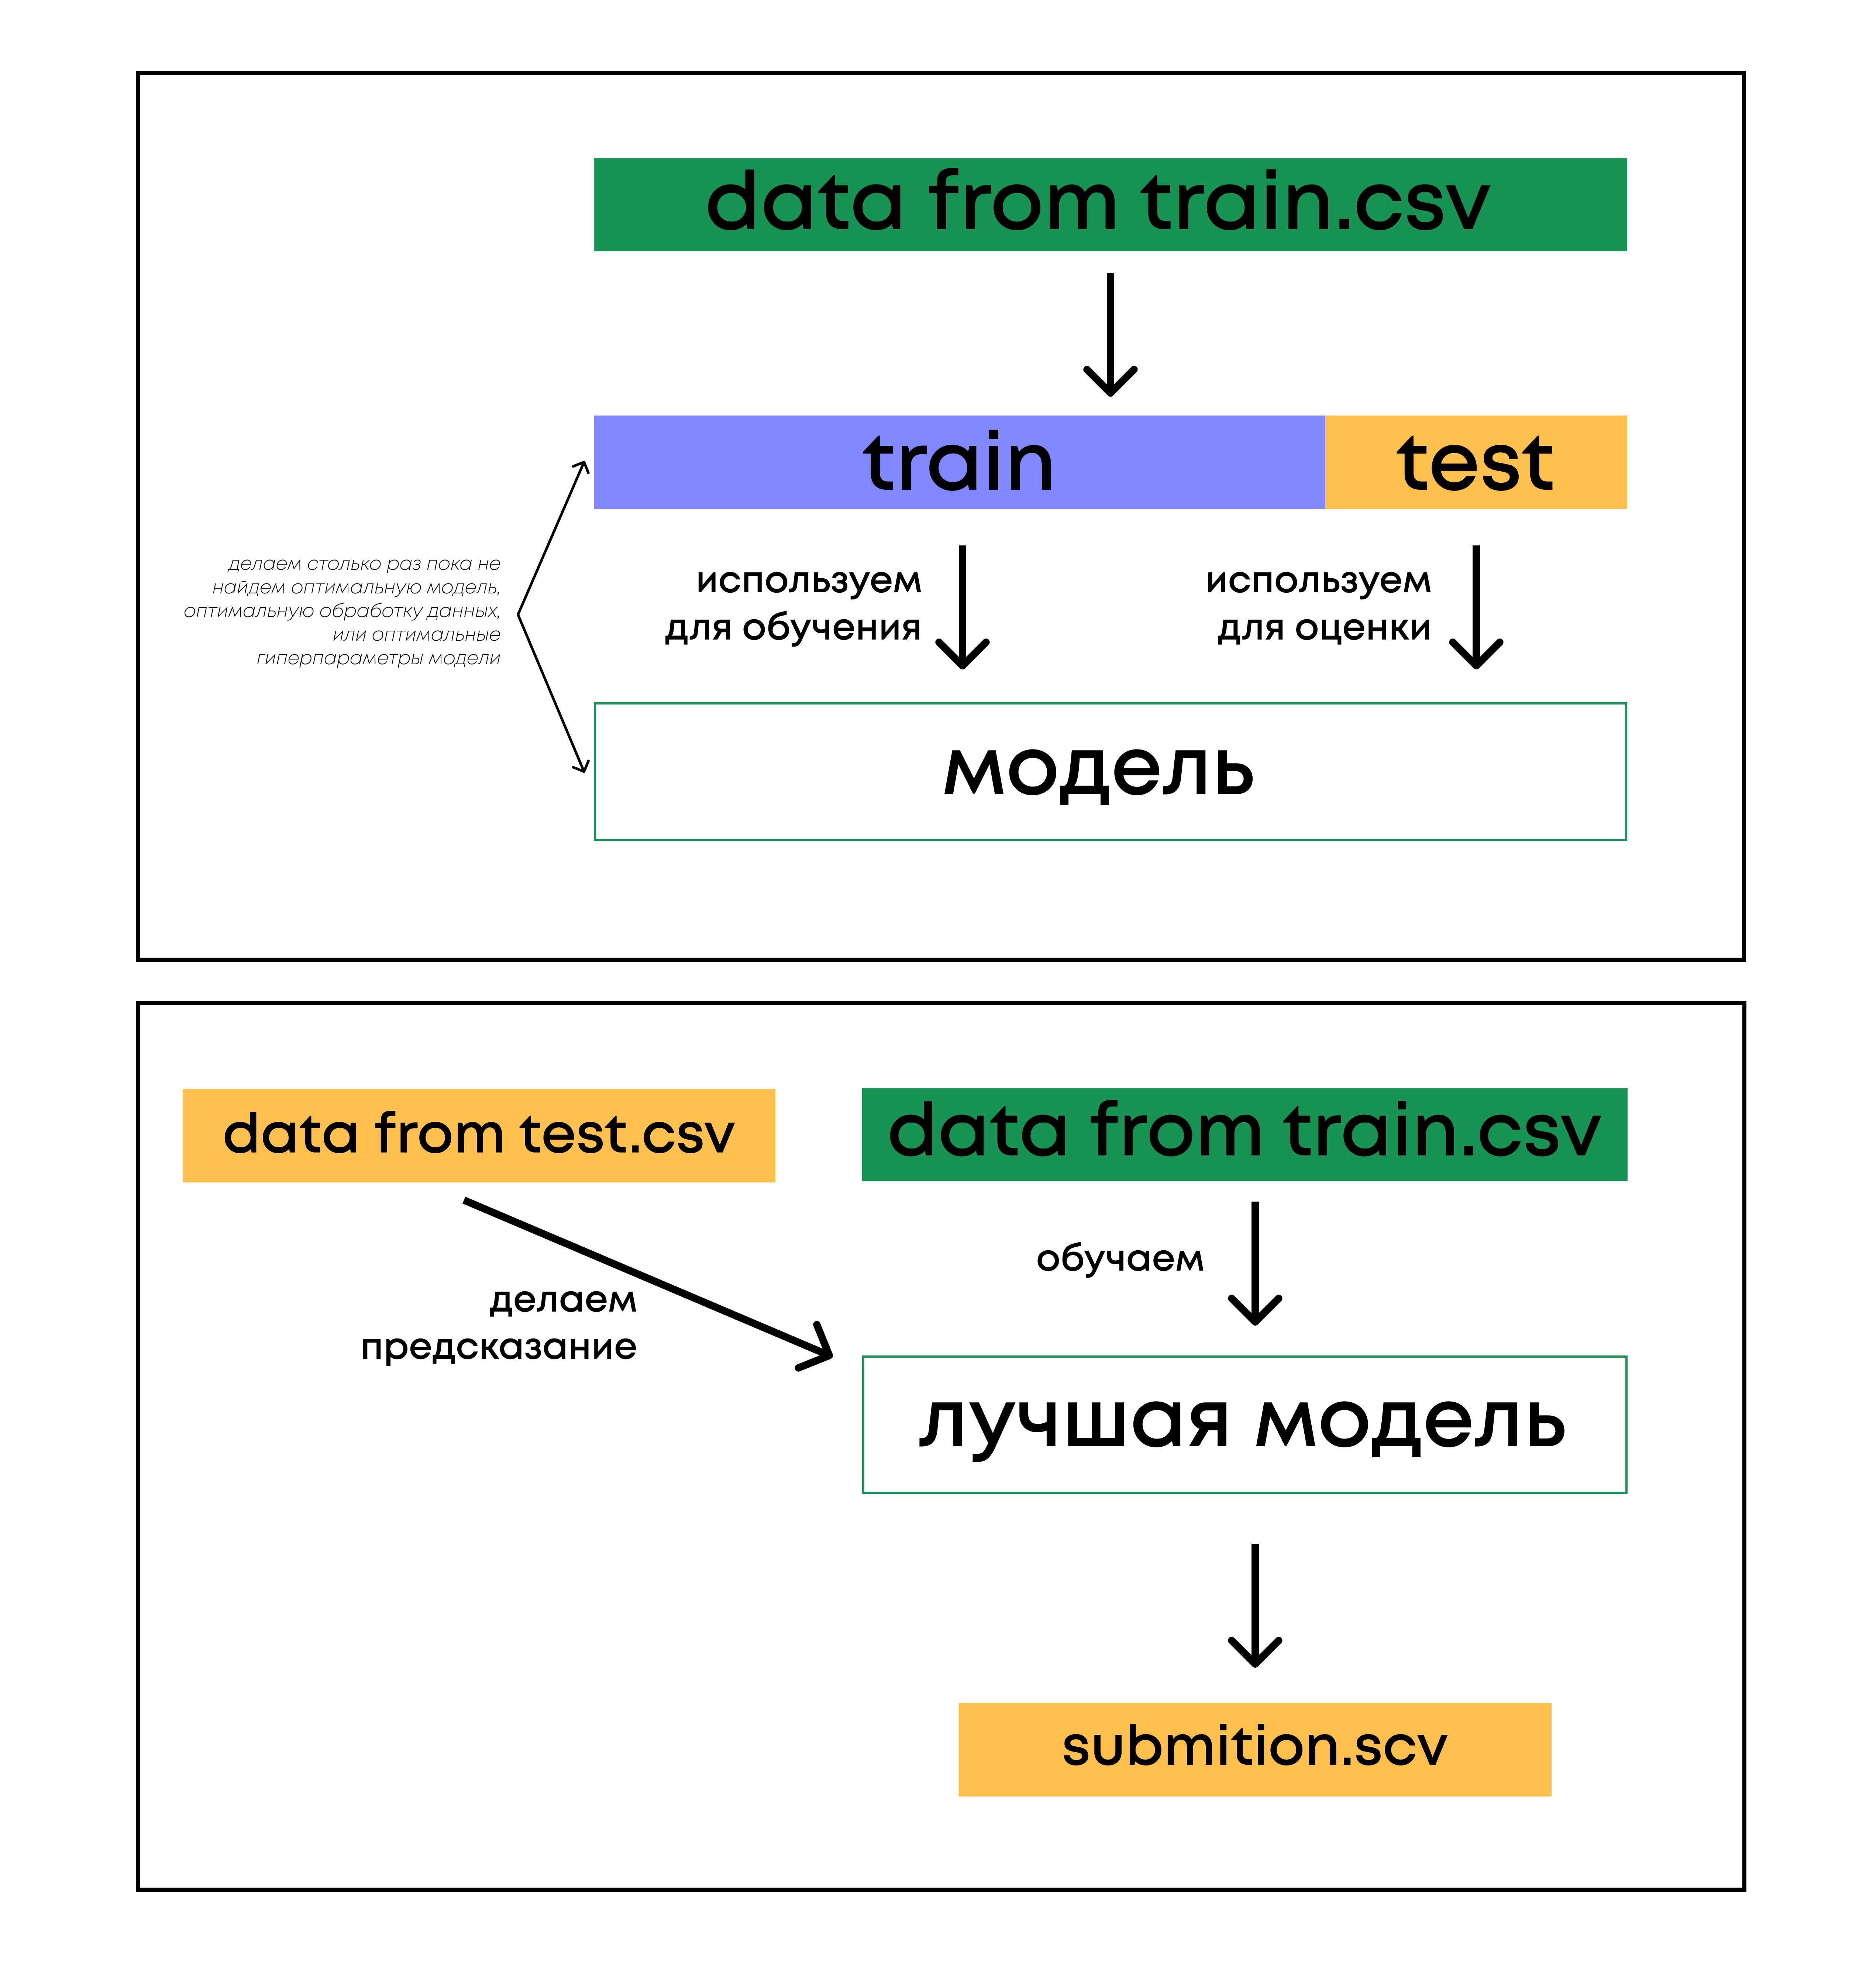

In [ ]:
X_train = train[['x', 'y', 'z']]
y_train = train[['u_x', 'u_y', 'u_z', 'p']]
X_test = test[['x', 'y', 'z']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5972, 3) (5972, 4)
(2560, 3) (2560, 4)


In [ ]:
y_train

,u_x,u_y,u_z,p
1114,408.026232,1.209771e+01,-3.716802e+00,103313.789067
3470,394.889441,-6.326682e+00,-9.047170e+00,108377.910235
6391,395.378196,8.046961e+00,-2.252519e+01,104758.033824
1584,410.450000,-5.387442e-08,8.332461e-08,99999.999779
6876,409.333648,1.041227e-02,-1.731631e+00,100724.772335
...,...,...,...,...
2895,410.448322,-5.823559e-03,5.535212e-03,100006.236417
7813,410.437750,2.103327e-02,-1.014274e-02,100014.228548
905,410.432916,5.090149e-02,5.701098e-02,100036.652550
5192,409.132883,2.011840e+00,2.346733e+00,98890.637854


## Обучение модели

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# Модели для предсказания каждого из параметров
forest_ux = RandomForestRegressor()
forest_uy = RandomForestRegressor()
forest_uz = RandomForestRegressor()
forest_p = RandomForestRegressor()

catboost_ux = CatBoostRegressor()
catboost_uy = CatBoostRegressor()
catboost_uz = CatBoostRegressor()
catboost_p = CatBoostRegressor()

In [ ]:
y_test['u_x'].values.reshape((-1,1))

array([[409.26108251],
       [410.4485243 ],
       [409.74417508],
       ...,
       [410.43323464],
       [408.86672414],
       [410.44999998]])

In [ ]:
# Обучим и сравним модели для ux

forest_ux.fit(X_train, y_train['u_x'])
ux_pred_forest = forest_ux.predict(X_test)

catboost_ux.fit(X_train, y_train['u_x'], logging_level='Silent')
ux_pred_catboost = catboost_ux.predict(X_test)

print('MAE for RandomForest:', mean_absolute_error(y_test['u_x'], ux_pred_forest))
print('MAE for CatBoost:',mean_absolute_error(y_test['u_x'], ux_pred_catboost))

MAE for RandomForest: 0.9732559987652956
MAE for CatBoost: 1.43701977518906


In [ ]:
# Обучим и сравним модели для uy
forest_uy.fit(X_train, y_train['u_y'])
uy_pred_forest = forest_uy.predict(X_test)

catboost_uy.fit(X_train, y_train['u_y'], logging_level='Silent')
uy_pred_catboost = catboost_uy.predict(X_test)

print('MAE for RandomForest:', mean_absolute_error(y_test['u_y'], uy_pred_forest))
print('MAE for CatBoost:',mean_absolute_error(y_test['u_y'], uy_pred_catboost))

MAE for RandomForest: 1.1722754439777692
MAE for CatBoost: 1.471701903909141


In [ ]:
# Обучим и сравним модели для uz
forest_uz.fit(X_train, y_train['u_z'])
uz_pred_forest = forest_uz.predict(X_test)

catboost_uz.fit(X_train, y_train['u_z'], logging_level='Silent')
uz_pred_catboost = catboost_uz.predict(X_test)

print('MAE for RandomForest:', mean_absolute_error(y_test['u_z'], uz_pred_forest))
print('MAE for CatBoost:',mean_absolute_error(y_test['u_z'], uz_pred_catboost))

MAE for RandomForest: 0.9223331000811925
MAE for CatBoost: 1.3872120839896847


In [ ]:
# Обучим и сравним модели для uz
forest_p.fit(X_train, y_train['p'])
p_pred_forest = forest_p.predict(X_test)

catboost_p.fit(X_train, y_train['p'], logging_level='Silent')
p_pred_catboost = catboost_p.predict(X_test)

print('MAE for RandomForest:', mean_absolute_error(y_test['p'], p_pred_forest))
print('MAE for CatBoost:',mean_absolute_error(y_test['p'], p_pred_catboost))

MAE for RandomForest: 475.5941109468775
MAE for CatBoost: 725.7526235746054


## Обучим модель на `MultiOutput`

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor()

rand_forest.fit(X_train, y_train)

predictions = rand_forest.predict(X_test)

In [ ]:
predictions

array([[ 4.09427178e+02,  1.13656229e+00, -3.51176417e+00,
         1.01299983e+05],
       [ 4.10449620e+02,  6.94275689e-04, -8.52461829e-04,
         1.00003040e+05],
       [ 4.09690404e+02,  3.91261863e-01, -4.61904537e+00,
         9.87893119e+04],
       ...,
       [ 4.10434334e+02,  1.52060323e-03,  4.27410909e-02,
         1.00029739e+05],
       [ 4.08020815e+02, -1.06120409e+00,  4.61821862e+00,
         1.00531024e+05],
       [ 4.10450000e+02,  1.33647675e-06, -2.04118610e-06,
         1.00000046e+05]])

In [ ]:
# Расчет MAE для каждой целевой переменной
mae_ux = mean_absolute_error(y_test.iloc[:, 0], predictions[:, 0])
mae_uy = mean_absolute_error(y_test.iloc[:, 1], predictions[:, 1])
mae_uz = mean_absolute_error(y_test.iloc[:, 2], predictions[:, 2])
mae_p = mean_absolute_error(y_test.iloc[:, 3], predictions[:, 3])

# Среднее MAE для всех целевых переменных
overall_mae = np.mean([mae_ux, mae_uy, mae_uz, mae_p])

print(f"MAE for u_x: {mae_ux:.4f}")
print(f"MAE for u_y: {mae_uy:.4f}")
print(f"MAE for u_z: {mae_uz:.4f}")
print(f"MAE for p: {mae_p:.4f}")
print(f"Overall MAE: {overall_mae:.4f}")

MAE for u_x: 1.0046
MAE for u_y: 1.2496
MAE for u_z: 1.1612
MAE for p: 472.3092
Overall MAE: 118.9311


## Сделаем ответы для `test.csv`

In [ ]:
X_train = train[['x', 'y', 'z']]
y_train = train[['u_x', 'u_y', 'u_z', 'p']]
X_test = test[['x', 'y', 'z']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Прогноз
predictions = model.predict(X_test)

In [ ]:
submission = pd.DataFrame(predictions, columns=['u_x', 'u_y', 'u_z', 'p'])
submission

,u_x,u_y,u_z,p
0,410.450000,-0.000001,-3.443634e-07,100000.175618
1,410.421128,0.018541,-3.425761e-02,100031.708148
2,410.440395,0.006931,5.518965e-02,100030.728466
3,411.262382,-1.143492,-9.056431e+00,101873.414870
4,409.503309,2.547953,-4.035914e+00,101049.878188
...,...,...,...,...
3651,410.400220,-0.006307,-1.228810e-01,100065.377771
3652,410.450000,-0.000002,1.779747e-05,99999.911055
3653,404.704254,-7.653407,2.157390e+00,102915.503622
3654,408.785286,-0.228442,2.548173e+00,101137.974552


In [ ]:
submission.to_csv('submission.csv', index=False, float_format='%.4f')

Результат в контесте:

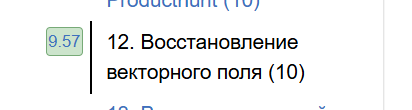

# 11. Рейтинг стартапов на Producthunt (10)

Ваш знакомый Вася решил создать стартап и привлечь инвестиции. Для этого он хочет разместить информацию о своем стартапе на Producthunt — платформе, где создатели размещают информацию о своих стартапах, а пользователи за эти стартапы голосуют. Вася хочет, чтобы как можно больше пользователей проголосовали за его стартап. Поэтому он хочет понять, какие факторы влияют на то, сколько голосов получит та или иная идея на Producthunt. Для этого Вася попросил вас создать модель машинного обучения, которая по информации на странице стартапа предсказывала бы, сколько голосов этот стартап получит.

**Формат ввода**

Данные доступны по ссылке https://disk.yandex.ru/d/RKfUnpuddXZ0vg. Вам дана обучающая выборка `producthunt_train.csv` с информацией о стартапах. Целевая переменная `votesCount` содержит количество голосов, которое этот стартап получил.

**Формат вывода**

Вам необходимо для всех строк из тестовой выборки `producthunt_test.csv` предсказать количество голосов, которое получит соответствующий стартап. Файл `sample_submission.csv` содержит требуемый формат сдачи.

## Пояснение

Во-первых, давайте разберемся с каким типо задачи ML мы имеем дело.

**Задача регрессии** — это тип задачи в машинном обучении, где мы хотим научиться предсказывать числовое значение на основе входных данных.

Например, представьте, что мы хотим спрогнозировать:
- цену дома на основе его характеристик (площади, количества комнат, местоположения),
- температуру на завтра на основе данных о погоде,
количество просмотров статьи, основываясь на ее содержании.

В задаче регрессии модель учится находить зависимости между входными данными (набором характеристик - $X$) и выходом (целевым значением - $Y$).

После обучения модель может принимать новые данные и выдавать прогнозируемое значение, которое, по её "мнению", максимально близко к реальному ответу.

Регрессия работает с **непрерывными числовыми значениями**. Это значит, что ответы (или предсказания), которые модель регрессии выдает, могут быть любыми числами в определенном диапазоне, а не ограниченным набором категорий.

В отличие от регрессии, в задаче классификации ответом обычно является один из нескольких фиксированных классов или категорий, например, «да» или «нет», или «красный», «синий» или «зеленый», т.е. ответ в классификациях является **дискретным**.

## Загрузка данных

In [ ]:
# Монтирует google disk в colab
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir(r"/content/gdrive/MyDrive/Я-профи/ДемоВерсия ИИ 2024/Рейтинг стартапов на Producthunt (магистратура)")

os.listdir()

['producthunt_train.csv',
 'sample_submission.csv',
 'producthunt_test.csv',
 'catboost_info',
 'submition.csv',
 'submition_w_tagline.csv']

In [ ]:
import pandas as pd

train = pd.read_csv('producthunt_train.csv')
test = pd.read_csv('producthunt_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(56702, 9)
(12708, 8)
(12708, 2)


In [ ]:
train.head()

,id,slug,name,tagline,commentsCount,dateAdded,timeAdded,topics,votesCount
0,0,superannotate-desktop,SuperAnnotate Desktop,Super easy and fast ML annotations on your PC,93,2020-10-29,07:18:00,"Windows, Mac, SaaS, Developer Tools, Artificia...",660
1,1,pricing-page,Pricing Page,No-code pricing pages with Stripe checkout,4,2021-06-20,15:31:23,"SaaS, E-Commerce",140
2,2,infinitemail,Infinitemail,The better way to get email marketing done for...,19,2023-06-05,07:23:32,"Design Tools, Email Marketing, Marketing",77
3,3,quarter-super-charge-powerbank,Quarter Super Charge Powerbank,The first powerbank using the MagSafe for supe...,10,2015-10-23,07:14:22,Tech,126
4,4,stickymappers,Stickymappers,The sexiest green stickers on the iMessage store.,3,2016-10-05,07:03:00,"Messaging, Tech",122


In [ ]:
test.head()

,id,slug,name,tagline,commentsCount,dateAdded,timeAdded,topics
0,56702,the-trip-tribe,The Trip Tribe,Book travel with others that share your interests,5,2015-08-16,12:36:47,"Web App, Tech"
1,56703,superpersonal,Superpersonal,Personalised styling and virtual fitting room,1,2019-09-08,08:11:45,"Android, iOS, Fashion, Artificial Intelligence..."
2,56704,savemytime-time-tracker,SaveMyTime - Time Tracker,A new way to track time and analyse productivity,33,2016-09-19,09:03:54,"Android, Productivity, Tech"
3,56705,atheena,Atheena,Wall Street experts in your pocket,11,2021-04-17,07:01:00,"Web App, Fintech, Investing"
4,56706,spotiapp,SpotiApp,Export music to Spotify from any musical services,38,2020-03-02,08:00:00,"iOS, Music, Spotify, Developer Tools, Apple"


In [ ]:
sample_submission.head()

,id,votesCount
0,56702,0
1,56703,0
2,56704,0
3,56705,0
4,56706,0


## Небольшое исследование данных

In [ ]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(56702, 9)
(12708, 8)
(12708, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             56702 non-null  int64 
 1   slug           56702 non-null  object
 2   name           56702 non-null  object
 3   tagline        56702 non-null  object
 4   commentsCount  56702 non-null  int64 
 5   dateAdded      56702 non-null  object
 6   timeAdded      56702 non-null  object
 7   topics         56098 non-null  object
 8   votesCount     56702 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.9+ MB


**Посмотрев на датасет, мы видим:**

1. Не все переменные числовые, есть переменные строковые, значит надо что-то делать.
2. У нас есть пропуски (`NaN`) в переменно `topics`. Тоже надо что-то делать.
3. Также у нас есть переменные `dateAdded` и `timeAdded` которые являются строковыми, но на самом деле представляют собой дату и время, для которых в питоне есть собственный тип данных.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708 entries, 0 to 12707
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             12708 non-null  int64 
 1   slug           12708 non-null  object
 2   name           12707 non-null  object
 3   tagline        12707 non-null  object
 4   commentsCount  12708 non-null  int64 
 5   dateAdded      12708 non-null  object
 6   timeAdded      12708 non-null  object
 7   topics         12568 non-null  object
dtypes: int64(2), object(6)
memory usage: 794.4+ KB


## Предобработка данных

Стоит сказать, что данные `train.csv` и `test.csv` должны обрабатывать одинаковым образом, чтобы модель работала корректно.

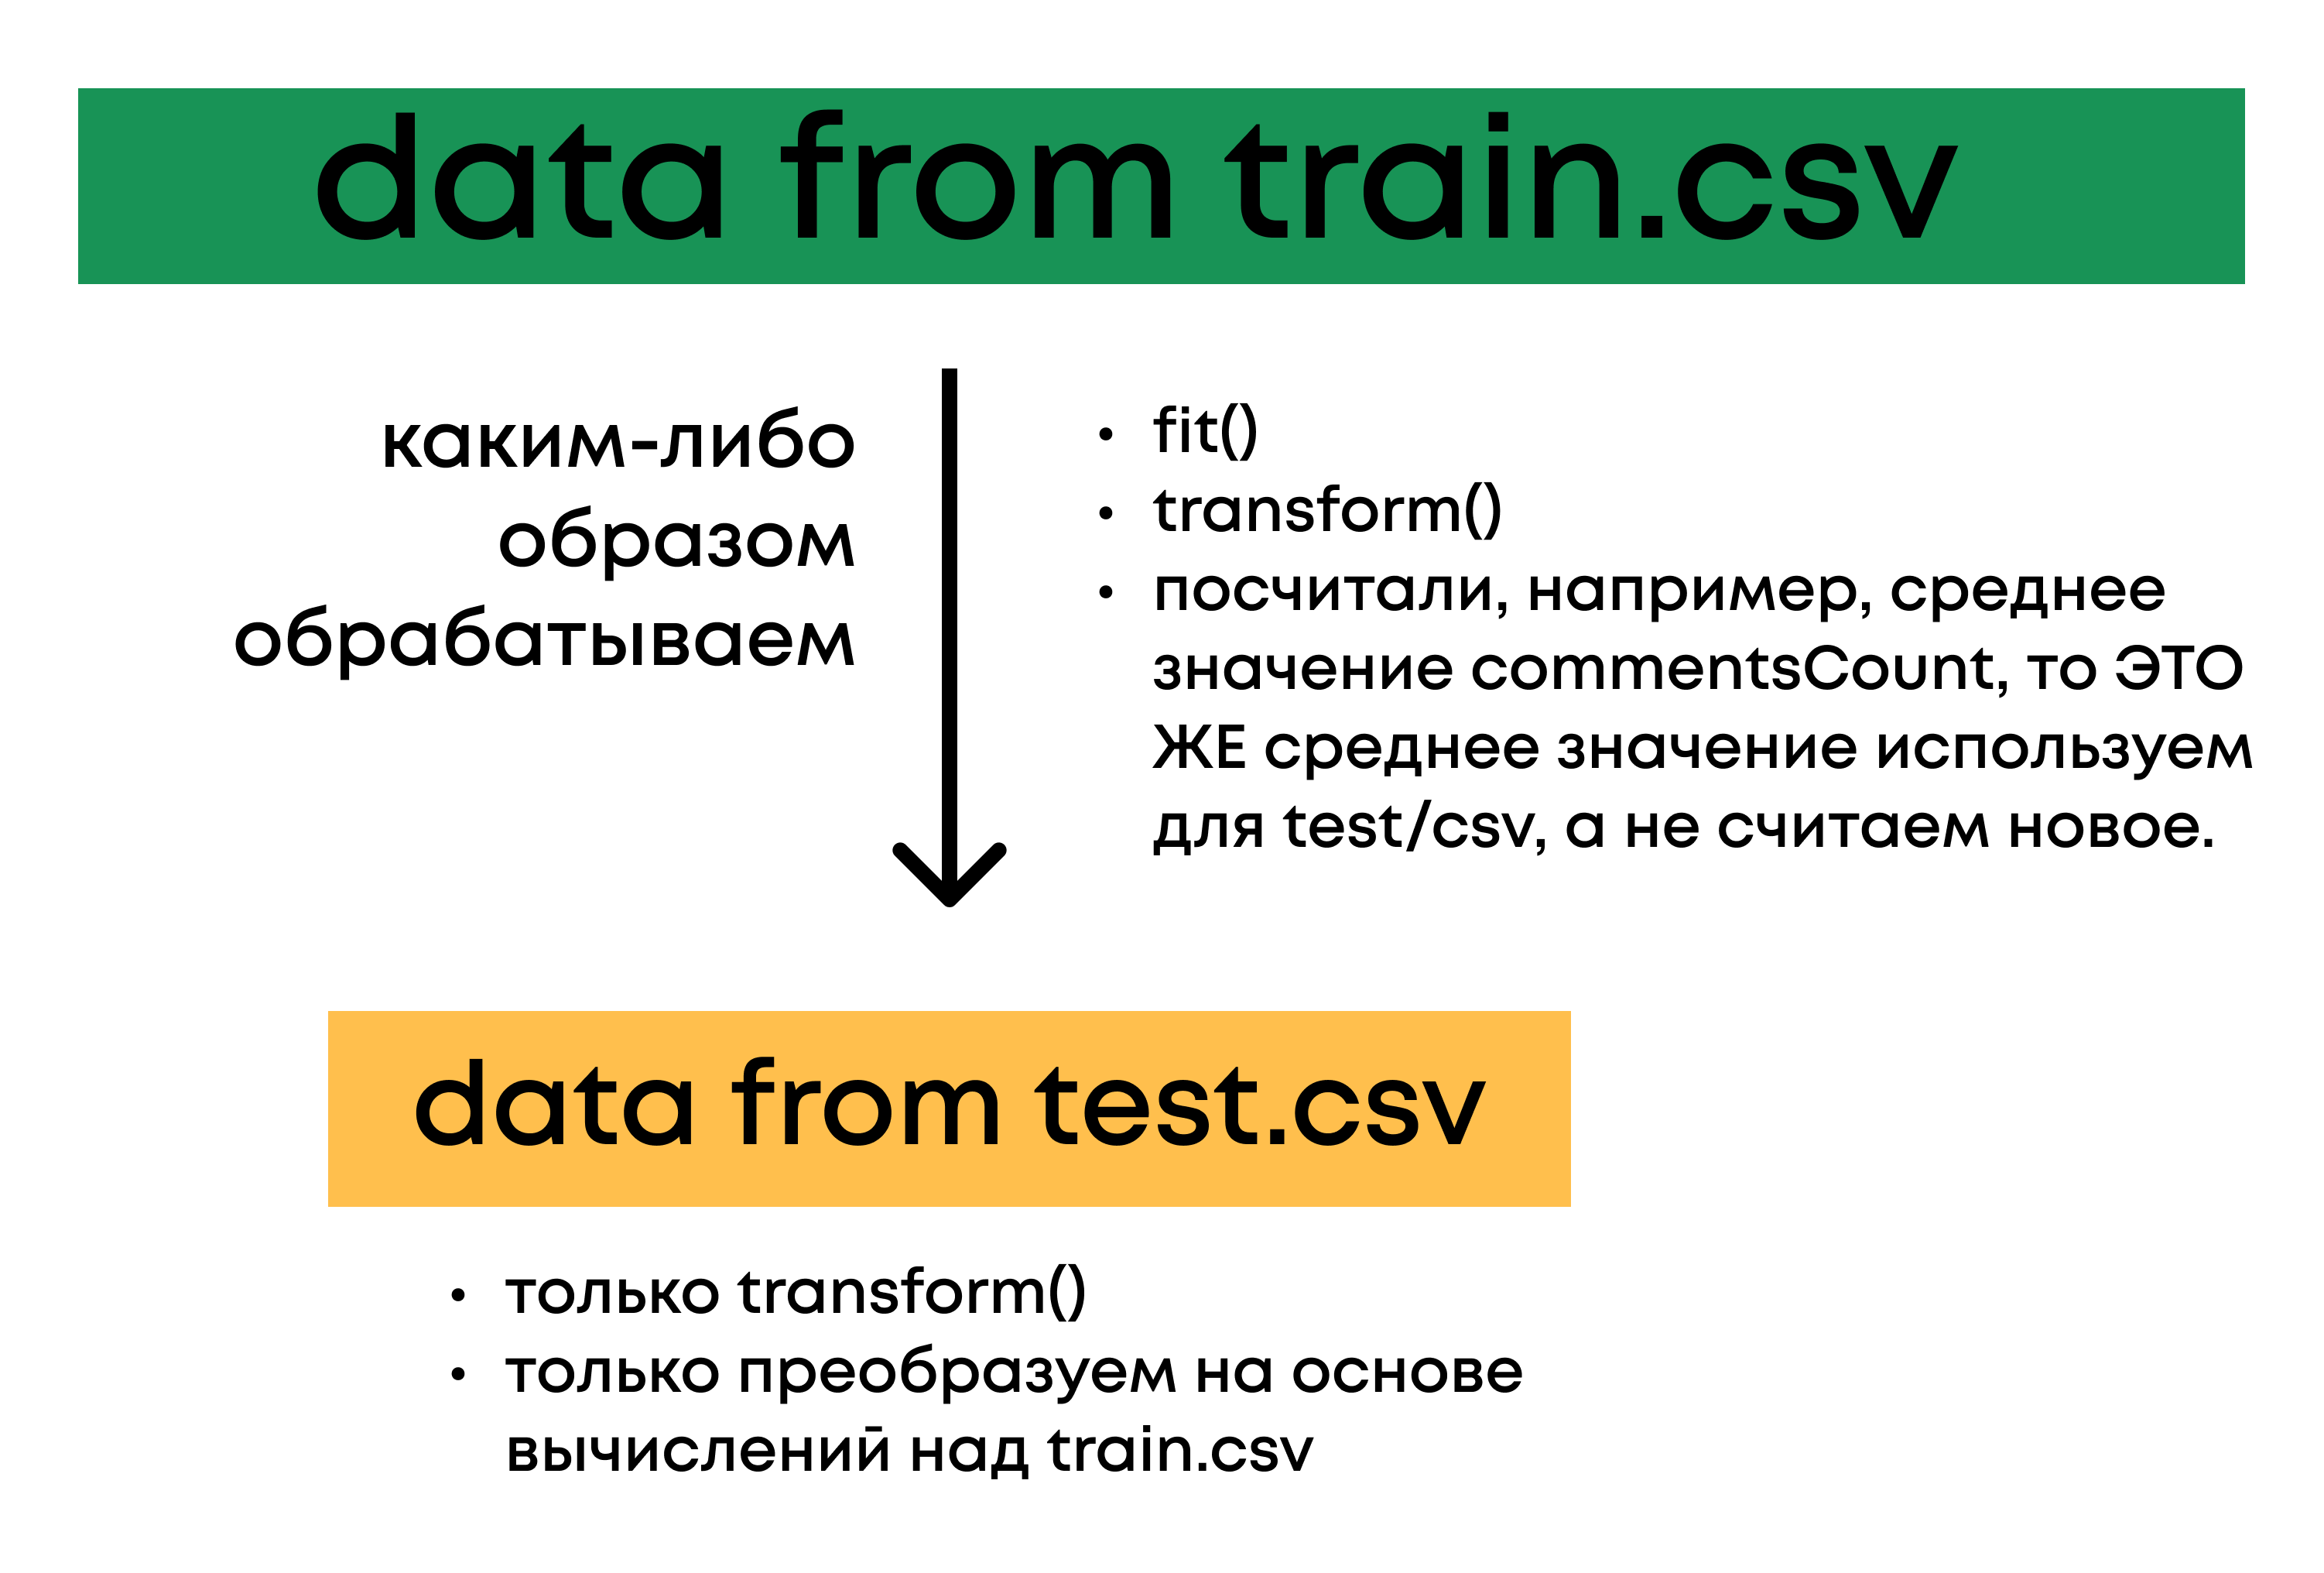

In [ ]:
train.head(2)

,id,slug,name,tagline,commentsCount,dateAdded,timeAdded,topics,votesCount
0,0,superannotate-desktop,SuperAnnotate Desktop,Super easy and fast ML annotations on your PC,93,2020-10-29,07:18:00,"Windows, Mac, SaaS, Developer Tools, Artificia...",660
1,1,pricing-page,Pricing Page,No-code pricing pages with Stripe checkout,4,2021-06-20,15:31:23,"SaaS, E-Commerce",140


### Начнем с обработки колонки с датой и временем

In [ ]:
train['dateAdded'] = pd.to_datetime(train['dateAdded'], format='%Y-%m-%d')
train['timeAdded'] = pd.to_datetime(train['timeAdded'], format='%H:%M:%S').dt.time

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             56702 non-null  int64         
 1   slug           56702 non-null  object        
 2   name           56702 non-null  object        
 3   tagline        56702 non-null  object        
 4   commentsCount  56702 non-null  int64         
 5   dateAdded      56702 non-null  datetime64[ns]
 6   timeAdded      56702 non-null  object        
 7   topics         56098 non-null  object        
 8   votesCount     56702 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.9+ MB


In [ ]:
# ТОЖЕ САМОЕ ДЛЯ test.csv
test['dateAdded'] = pd.to_datetime(test['dateAdded'], format='%Y-%m-%d')
test['timeAdded'] = pd.to_datetime(test['timeAdded'], format='%H:%M:%S').dt.time

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708 entries, 0 to 12707
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             12708 non-null  int64         
 1   slug           12708 non-null  object        
 2   name           12707 non-null  object        
 3   tagline        12707 non-null  object        
 4   commentsCount  12708 non-null  int64         
 5   dateAdded      12708 non-null  datetime64[ns]
 6   timeAdded      12708 non-null  object        
 7   topics         12568 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 794.4+ KB


### Теперь давайте разберемся со строковыми переменными

In [ ]:
train.head(2)

,id,slug,name,tagline,commentsCount,dateAdded,timeAdded,topics,votesCount
0,0,superannotate-desktop,SuperAnnotate Desktop,Super easy and fast ML annotations on your PC,93,2020-10-29,07:18:00,"Windows, Mac, SaaS, Developer Tools, Artificia...",660
1,1,pricing-page,Pricing Page,No-code pricing pages with Stripe checkout,4,2021-06-20,15:31:23,"SaaS, E-Commerce",140


In [ ]:
# количество различных значений в переменной slug огромно
# значит это не дискретная (не категориальная переменная)
# так что скорее всего - это некий уникальный идентификатор
print(train.shape)
train['slug'].nunique()

(56702, 9)


52596

In [ ]:
train['name'].nunique()

50575

In [ ]:
train['commentsCount'].nunique()

477

In [ ]:
train['topics'].nunique()

21295

In [ ]:
topics_train = train['topics'].str.get_dummies(sep=',')
topics_train

,3D Modeling,3D Printer,A/B Testing,API,ARKit,Accessories,Accounting,Action Games,Ad Blockers,Adult Coloring Books,...,Wine,Word Games,WordPress,Writing,XBox,Yoga Books,YouTube,eBook Reader,iOS,iPad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
topics_train.columns
# видим что появился лишний пробел
# из-за чего могут появлся новые ненужные категории
# например ' API' и 'API' - для алгоритмов это РАЗНЫЕ ЗНАЧЕНИЯ

Index([' 3D Modeling', ' 3D Printer', ' A/B Testing', ' API', ' ARKit',
       ' Accessories', ' Accounting', ' Action Games', ' Ad Blockers',
       ' Adult Coloring Books',
       ...
       'Wine', 'Word Games', 'WordPress', 'Writing', 'XBox', 'Yoga Books',
       'YouTube', 'eBook Reader', 'iOS', 'iPad'],
      dtype='object', length=678)

In [ ]:
# давайте удалим пробелы и оставим только ,
train['topics'] = train['topics'].str.replace(', ', ',')
topics_train = train['topics'].str.get_dummies(sep=',')
topics_train

,3D Modeling,3D Printer,A/B Testing,API,ARKit,Accessories,Accounting,Action Games,Ad Blockers,Adult Coloring Books,...,Writing,XBox,Yoga Books,YouTube,Zombie Games,eBook Reader,iMessage Apps,iOS,iPad,reddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ТОЖЕ САМОЕ для test.csv
test['topics'] = test['topics'].str.replace(', ', ',')
topics_test = test['topics'].str.get_dummies(sep=',')
topics_test

,3D Modeling,3D Printer,A/B Testing,API,ARKit,Accessories,Accounting,Action Games,Ad Blockers,Adult Coloring Books,...,Writing,XBox,Yoga Books,YouTube,Zombie Games,eBook Reader,iMessage Apps,iOS,iPad,reddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
12704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**После такого преобразования мы видим**, что часть топиков из `train.csv` отсутствует в `test.csv`.

**Что делать?**

In [ ]:
print(topics_train.shape)
print(topics_test.shape)

(56702, 403)
(12708, 365)


In [ ]:
# ну для начала найдем пересечение
# проще всего через множества

intersept_topics = set(topics_train) & set(topics_test)
len(intersept_topics)

361

In [ ]:
list(intersept_topics)[:4]

['Climate Tech', 'Social Network', 'Outdoors', 'Movies']

In [ ]:
# возьмем только те колонки, что есть в обоих наборах данных

topics_train = topics_train[list(intersept_topics)]
topics_test = topics_test[list(intersept_topics)]

In [ ]:
print(topics_train.shape)
print(topics_test.shape)

(56702, 361)
(12708, 361)


In [ ]:
# давайте добавим сюда еще возможные полезные переменные

topics_train["year_dateAdded"] = train["dateAdded"].dt.year
topics_train["month_dateAdded"] = train["dateAdded"].dt.month
topics_train["day_dateAdded"] = train["dateAdded"].dt.day

topics_test["year_dateAdded"] = test["dateAdded"].dt.year
topics_test["month_dateAdded"] = test["dateAdded"].dt.month
topics_test["day_dateAdded"] = test["dateAdded"].dt.day

topics_train

<ipython-input-17-e8439bd791d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_train["year_dateAdded"] = train["dateAdded"].dt.year
<ipython-input-17-e8439bd791d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_train["month_dateAdded"] = train["dateAdded"].dt.month
<ipython-input-17-e8439bd791d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Retro Games,Drinking,Graphics,Shopping,Crafting Games,Data & Analytics,Business Intelligence,Indie Games,Newsletters,Fighting Games,...,Sales,Hacking,Biking,Android,Business Travel,WordPress,Events,year_dateAdded,month_dateAdded,day_dateAdded
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,10,29
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021,6,20
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023,6,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2015,10,23
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2018,5,9
56698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2015,3,9
56699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,7,23
56700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2015,5,2


In [ ]:
print(topics_train.shape)
print(topics_test.shape)

(56702, 364)
(12708, 364)


### Обработка перменной `tagline`

In [ ]:
train['tagline']

,tagline
0,Super easy and fast ML annotations on your PC
1,No-code pricing pages with Stripe checkout
2,The better way to get email marketing done for...
3,The first powerbank using the MagSafe for supe...
4,The sexiest green stickers on the iMessage store.
...,...
56697,Turn conversations 💬 into summaries 📝
56698,Project status pages communicate progress for you
56699,"Create beautiful user flow charts, sitemaps an..."
56700,Airbnb for photo studios


In [ ]:
test['tagline']

,tagline
0,Book travel with others that share your interests
1,Personalised styling and virtual fitting room
2,A new way to track time and analyse productivity
3,Wall Street experts in your pocket
4,Export music to Spotify from any musical services
...,...
12703,Make simple gradient wallpapers for your iOS D...
12704,Easily build automated personalized email mark...
12705,How to apply behavioral economics when buildin...
12706,Don't know where to eat? Problem solved.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ',
             41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ',
             59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ',
             93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

train['tagline'] = train['tagline'].map(lambda x: remove_punct(x))
train['tagline'] = train['tagline'].str.lower() # upper()

# СРАЗУ делаем тоже самое для test.csv

# в тесте в одном месте его Nan, заменим его на пустую строку
test['tagline'] = test['tagline'].fillna('')

test['tagline'] = test['tagline'].map(lambda x: remove_punct(x))
test['tagline'] = test['tagline'].str.lower() # upper()

train['tagline']

,tagline
0,super easy and fast ml annotations on your pc
1,no code pricing pages with stripe checkout
2,the better way to get email marketing done for...
3,the first powerbank using the magsafe for supe...
4,the sexiest green stickers on the imessage store
...,...
56697,turn conversations 💬 into summaries 📝
56698,project status pages communicate progress for you
56699,create beautiful user flow charts sitemaps an...
56700,airbnb for photo studios


In [ ]:
train.loc[105, 'tagline']

'try  test and go crazy with pre released versions of android'

In [ ]:
stop_words = list(stopwords.words('english'))
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
# Функция для удаления стоп-слов
def remove_stop_words(text):
    words = text.split()  # Разбиваем текст на слова
    cleaned_text = ' '.join([word for word in words if word.lower() not in stop_words])
    return cleaned_text

train['tagline'] = train['tagline'].apply(remove_stop_words)

# СРАЗУ делаем тоже самое для test.csv
test['tagline'] = test['tagline'].apply(remove_stop_words)

In [ ]:
train.loc[105, 'tagline']

'try test go crazy pre released versions android'

In [ ]:
train.loc[56697, 'tagline']

'turn conversations 💬 summaries 📝'

In [ ]:
import re

# Регулярное выражение для удаления эмодзи
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               "\U0001F600-\U0001F64F"  # Смайлики и эмоции
                               "\U0001F300-\U0001F5FF"  # Символы и пиктограммы
                               "\U0001F680-\U0001F6FF"  # Транспорт и карты
                               "\U0001F700-\U0001F77F"  # Разные символы
                               "\U0001F780-\U0001F7FF"  # Геометрические фигуры
                               "\U0001F800-\U0001F8FF"  # Разные символы
                               "\U0001F900-\U0001F9FF"  # Разные символы
                               "\U0001FA00-\U0001FA6F"  # Дополнительные символы
                               "\U00002700-\U000027BF"  # Разные символы
                               "\U0001F1E0-\U0001F1FF"  # Флаги
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Применяем функцию к колонке 'text'
train['tagline'] = train['tagline'].apply(remove_emoji)

train.loc[56697, 'tagline']

'turn conversations  summaries '

In [ ]:
# СРАЗУ делаем тоже самое для test.csv

test['tagline'] = test['tagline'].apply(remove_emoji)

In [ ]:
from sklearn.feature_extraction.text import TF_IDDF

vectorizer = CountVectorizer(max_features=200)

X_train = vectorizer.fit_transform(train['tagline'])

# СРАЗУ делаем тоже самое для test.csv
# Обратите внимание, тут ТОЛЬКО transform
X_test = vectorizer.transform(test['tagline'])

tagline_train = pd.DataFrame(data = X_train.toarray(), columns=vectorizer.get_feature_names_out())

# СРАЗУ делаем тоже самое для test.csv
tagline_test = pd.DataFrame(data = X_test.toarray(), columns=vectorizer.get_feature_names_out())

tagline_train

,100,3d,add,ai,analytics,android,api,app,apple,apps,...,visual,voice,watch,way,web,website,websites,without,work,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Создаем итоговый набор данных

In [ ]:
print(topics_train.shape)
print(topics_test.shape)

print(tagline_train.shape)
print(tagline_test.shape)

(56702, 364)
(12708, 364)
(56702, 200)
(12708, 200)


In [ ]:
train_X = pd.concat([topics_train, tagline_train], axis = 1)
test_X = pd.concat([topics_test, tagline_test], axis = 1)

print(train_X.shape)
print(test_X.shape)

(56702, 564)
(12708, 564)


## Другой вариант обработки данных

In [ ]:
import pandas as pd

train = pd.read_csv('producthunt_train.csv')
test = pd.read_csv('producthunt_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,slug,name,tagline,commentsCount,dateAdded,timeAdded,topics,votesCount
0,0,superannotate-desktop,SuperAnnotate Desktop,Super easy and fast ML annotations on your PC,93,2020-10-29,07:18:00,"Windows, Mac, SaaS, Developer Tools, Artificia...",660
1,1,pricing-page,Pricing Page,No-code pricing pages with Stripe checkout,4,2021-06-20,15:31:23,"SaaS, E-Commerce",140
2,2,infinitemail,Infinitemail,The better way to get email marketing done for...,19,2023-06-05,07:23:32,"Design Tools, Email Marketing, Marketing",77
3,3,quarter-super-charge-powerbank,Quarter Super Charge Powerbank,The first powerbank using the MagSafe for supe...,10,2015-10-23,07:14:22,Tech,126
4,4,stickymappers,Stickymappers,The sexiest green stickers on the iMessage store.,3,2016-10-05,07:03:00,"Messaging, Tech",122


In [ ]:
import numpy as np

type(np.NaN)

float

In [ ]:
train['topics'] = train['topics'].fillna('')

test['topics'] = test['topics'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()# max_features=20)

vectorizer.fit(train["topics"])

train_texts = vectorizer.transform(train["topics"])

test_texts = vectorizer.transform(test["topics"])

In [ ]:
topics_train = pd.DataFrame(data = train_texts.toarray(), columns=vectorizer.get_feature_names_out())

# СРАЗУ делаем тоже самое для test.csv
topics_test = pd.DataFrame(data = test_texts.toarray(), columns=vectorizer.get_feature_names_out())

topics_train.head()

,3d,accessories,accounting,action,ad,adult,adventure,advertising,affiliate,alarms,...,wireframing,word,wordpress,work,world,writing,xbox,yoga,youtube,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
topics_test.head()

,3d,accessories,accounting,action,ad,adult,adventure,advertising,affiliate,alarms,...,wireframing,word,wordpress,work,world,writing,xbox,yoga,youtube,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# давайте добавим сюда еще возможные полезные переменные

train['dateAdded'] = pd.to_datetime(train['dateAdded'], format='%Y-%m-%d')
train['timeAdded'] = pd.to_datetime(train['timeAdded'], format='%H:%M:%S').dt.time

test['dateAdded'] = pd.to_datetime(test['dateAdded'], format='%Y-%m-%d')
test['timeAdded'] = pd.to_datetime(test['timeAdded'], format='%H:%M:%S').dt.time

topics_train["year_dateAdded"] = train["dateAdded"].dt.year
topics_train["month_dateAdded"] = train["dateAdded"].dt.month
topics_train["day_dateAdded"] = train["dateAdded"].dt.day

topics_test["year_dateAdded"] = test["dateAdded"].dt.year
topics_test["month_dateAdded"] = test["dateAdded"].dt.month
topics_test["day_dateAdded"] = test["dateAdded"].dt.day

topics_train["commentsCount"] = train["commentsCount"]
topics_test["commentsCount"] = test["commentsCount"]

topics_train.head()

,3d,accessories,accounting,action,ad,adult,adventure,advertising,affiliate,alarms,...,world,writing,xbox,yoga,youtube,zombie,year_dateAdded,month_dateAdded,day_dateAdded,commentsCount
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,10,29,93
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2021,6,20,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023,6,5,19
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,10,23,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016,10,5,3


In [ ]:
print(topics_train.shape)
print(topics_test.shape)

(56702, 431)
(12708, 431)


## Обучение модели

In [ ]:
# выделим вектор целевой переменной
Y = train['votesCount']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(topics_train, Y, test_size=0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39691, 431) (39691,)
(17011, 431) (17011,)


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# rand_forest = RandomForestRegressor()
cat_boost = CatBoostRegressor()

# rand_forest.fit(X_train, y_train)
# y_pred_forest = rand_forest.predict(X_test)

cat_boost.fit(X_train, y_train, logging_level='Silent')
y_pred_catboost = cat_boost.predict(X_test)

# print('MAE for RandomForest:', mean_absolute_error(y_test, y_pred_forest))
print('MAE for CatBoost:',mean_absolute_error(y_test, y_pred_catboost))

# print('R2 for RandomForest:', r2_score(y_test, y_pred_forest))
print('R2 for CatBoost:',r2_score(y_test, y_pred_catboost))

MAE for CatBoost: 120.17248204362288
R2 for CatBoost: 0.5226928995678685


## Сделаем ответы для `test.csv`

In [ ]:
model = CatBoostRegressor()

model.fit(topics_train, Y, logging_level='Silent')

predictions = model.predict(topics_test)

In [ ]:
test["votesCount"] = predictions
test["votesCount"] = test["votesCount"].astype(int)

test[["id", "votesCount"]].to_csv("submition_w_topics.csv", index=False)

# 8. Путешествие по числовой прямой (7)

$n$ друзей решили сыграть в игру на числовой прямой. У каждого из друзей есть начальная координата $a_{i_0}$. Друзья по очереди переходят в координату, равную сумме координат остальных друзей. Так повторяется $k$ кругов.

Например, если $n = 3$, первый круг пройдет так:
- $a_{1_1} = a_{2_0} + a_{3_0}$
- $a_{2_1} = a_{1_1} + a_{3_0}$
- $a_{3_1} = a_{1_1} + a_{2_1}$

Правила для победы друзья еще не придумали, поэтому один из друзей попросил вас посчитать конечные координаты всех друзей. Так как эти числа могут быть достаточно большими, посчитайте их по модулю $1000000007$.

**Формат ввода**

В первой строке содержится одно число $t (1≤t≤10^4)$ — количество наборов входных данных. Далее следует описание наборов входных данных.

Первая строка каждого набора данных содержит 2 целых числа $n$ и $k$ $(2≤n≤20; 1≤k≤10^9)$.

Вторая строка каждого набора данных содержит $n$ целых числ $a_{i_0} (1≤a_{i_0}≤10^9)$.

**Формат вывода**

Для каждого наборов входных данных выведите $n$ целых чисел $a_{i_k}$ — координаты после оканчания игры по модулю $1000000007$.

In [ ]:
%%time

t = int(input())

all_sets = []

for i in range(t):
    one_set = {}

    one_set['n'], one_set['k'] = map(int, input().split())
    one_set['nums'] = list(map(int, input().split()))

    all_sets.append(one_set)

# 4
# 3 1
# 2 4 9
# 4 2
# 1 2 3 4
# 10 1000000000
# 1 2 3 4 5 6 7 8 9 10
# 2 10000000
# 11 20

4
3 1
2 4 9
4 2
1 2 3 4
10 1000000000
1 2 3 4 5 6 7 8 9 10
2 10000000
11 20


In [ ]:
all_sets

[{'n': 3, 'k': 1, 'nums': [2, 4, 9]},
 {'n': 4, 'k': 2, 'nums': [1, 2, 3, 4]},
 {'n': 10, 'k': 1000000000, 'nums': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
 {'n': 2, 'k': 10000000, 'nums': [11, 20]}]

In [ ]:
import numpy as np
one_set = {'n': 3, 'k': 1, 'nums': [2, 4, 9], 'final': [2, 4, 9]}

# это один круг
for i in range(one_set['n']):
    one_set['final'][i] = np.sum(one_set['final'][:i]) + np.sum(one_set['final'][i+1:])

one_set

{'n': 3, 'k': 1, 'nums': [2, 4, 9], 'final': [13.0, 22.0, 35.0]}

In [ ]:
import numpy as np
one_set = {'n': 3, 'k': 1, 'nums': [2, 4, 9], 'final': [2, 4, 9]}

for j in range(one_set['k']):
    for i in range(one_set['n']):
        one_set['final'][i] = np.sum(one_set['final'][:i]) + np.sum(one_set['final'][i+1:])

one_set

{'n': 3, 'k': 1, 'nums': [2, 4, 9], 'final': [13.0, 22.0, 35.0]}

In [ ]:
import numpy as np
one_set = {'n': 4, 'k': 2, 'nums': [1, 2, 3, 4], 'final': [1, 2, 3, 4]}

for j in range(one_set['k']):
    for i in range(one_set['n']):
        one_set['final'][i] = np.sum(one_set['final'][:i]) + np.sum(one_set['final'][i+1:])

one_set

{'n': 4, 'k': 2, 'nums': [1, 2, 3, 4], 'final': [99.0, 182.0, 335.0, 616.0]}

In [ ]:
%%time
import numpy as np
one_set = {'n': 2, 'k': 10000000, 'nums': [11, 20], 'final': [11, 20]}

for j in range(one_set['k']):
    for i in range(one_set['n']):
        one_set['final'][i] = np.sum(one_set['final'][:i]) + np.sum(one_set['final'][i+1:])

one_set

CPU times: user 4min 29s, sys: 349 ms, total: 4min 30s
Wall time: 4min 32s


{'n': 2, 'k': 10000000, 'nums': [11, 20], 'final': [20.0, 20.0]}

In [ ]:
# ОЧЕНЬ ПЛОХОЕ РЕШЕНИЕ

import numpy as np

t = int(input())

all_sets = []

for i in range(t):
    one_set = {}

    one_set['n'], one_set['k'] = map(int, input().split())
    one_set['nums'] = list(map(int, input().split()))

    all_sets.append(one_set)

for one_set in all_sets:
    for j in range(one_set['k']):
        for i in range(one_set['n']):
            one_set['final'][i] = np.sum(one_set['final'][:i]) + np.sum(one_set['final'][i+1:])

for one_set in all_sets:
    print(*one_set['final'])

In [ ]:
MOD = 1000000007

t = int(input())

all_sets = []
for _ in range(t):
    n, k = map(int, input().split())
    nums = list(map(int, input().split()))
    all_sets.append({'n': n, 'k': k, 'nums': nums})

for one_set in all_sets:
    n = one_set['n']
    k = one_set['k']
    nums = one_set['nums']

    # Если `k` равен 0, то выводим начальные значения
    if k == 0:
        one_set['final'] = nums
        continue

    # Текущее состояние массива
    current = nums[:]

    for _ in range(k):
        # Считаем сумму текущего состояния массива
        total_sum = sum(current) % MOD
        # Создаем новый массив для хранения следующего состояния
        next_state = [0] * n

        for i in range(n):
            # Считаем новую позицию для каждого элемента
            next_state[i] = (total_sum - current[i]) % MOD

        # Переход к следующему состоянию
        current = next_state

    # Сохраняем результат
    one_set['final'] = current

# Вывод
for one_set in all_sets:
    print(*one_set['final'])

13 11 6
21 22 23 24
311793781 311793782 311793783 311793784 311793785 311793786 311793787 311793788 311793789 311793790
11 20


In [ ]:
# 4
# 3 1
# 2 4 9
# 4 2
# 1 2 3 4
# 10 1000000000
# 1 2 3 4 5 6 7 8 9 10
# 2 10000000
# 11 20

# 9. Найти выравнивание (8)

В задаче распознавания речи возникает алгоритм выравнивания матрицы. Назначение алгоритма — построить соответствие между символами (буквами) распознанного текста и фрагментами аудиодорожки.

Пусть в распознанном тексте всего $n$ символов.

Разобьём аудиодорожку на $m$ фрагментов длиной, например, $0.1$ секунды. Будем считать, что каждый фрагмент времени соответствует ровно одному символу. При этом каждому символу может соответствовать больше одного фрагмента, но все фрагменты, соответствующие одному символу, должны идти подряд.

Наша цель — восстановить искомое соответствие. С помощью нейросетевой модели предскажем матрицу релевантностей $A=(a_{i,j})$ размера $n×m$, где $a_{i,j}$ — мера релевантности $i$-ого символа к $j$-ому фрагменту.

Необходимо построить соответствие символов и фрагментов так, чтобы максимизировать сумму релевантностей.

Иными словами, по данной матрице $A=(a_{i,j})$ размера $n×m$ необходимо найти такой непрерывный путь по клеткам матрицы, что:

- Пусть стартует из левой верхней клетки и заканчивается в правой нижней;
- Каждый шаг пути представляет из себя перемещение из текущей позиции или по диагонали вниз, или на правую ячейку внутри той же строки;
- Сумма релевантностей $a_{i,j}$ по клеткам пути максимально возможная.

**Формат ввода**

В первой строке написано число $n<=10^4$ — количество строк матрицы.

Во второй строке написано число $m<=10^4$ — количество столбцов матрицы, $m => n, mn <= 10^5$.

В следующих $n$ строках записаны элементы матрицы — по $m$ целых чисел $0<=a_{ij}<=10$ через запятую с пробелом в каждой строке.

**Формат вывода**

Выведите $n$ строк, в каждой строке по $m$ чисел через запятую с пробелом. Число равно $0$, если соответствующая клетка не является частью пути, и $1$, если является.

In [ ]:
3
4
1, 3, 1, 1
1, 2, 2, 2
4, 2, 1, 0

n = int(input())
m = int(input())

matrix = [list(map(int, input().split(', '))) for i in range(n)]

3
4
1, 3, 1, 1
1, 2, 2, 2
4, 2, 1, 0


Наша цель — восстановить искомое соответствие. С помощью нейросетевой модели предскажем матрицу релевантностей $A=(a_{i,j})$ размера $n×m$, где $a_{i,j}$ — мера релевантности $i$-ого символа к $j$-ому фрагменту.

Иными словами, по данной матрице $A=(a_{i,j})$ размера $n×m$ необходимо найти такой непрерывный путь по клеткам матрицы, что:

- Пусть стартует из левой верхней клетки и заканчивается в правой нижней;
- Каждый шаг пути представляет из себя перемещение из текущей позиции или по диагонали вниз, или на правую ячейку внутри той же строки;
- Сумма релевантностей $a_{i,j}$ по клеткам пути максимально возможная.

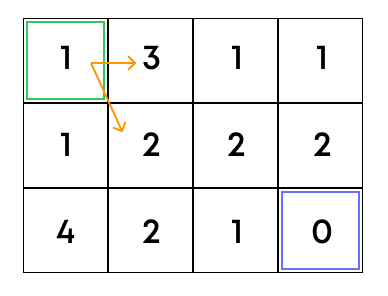

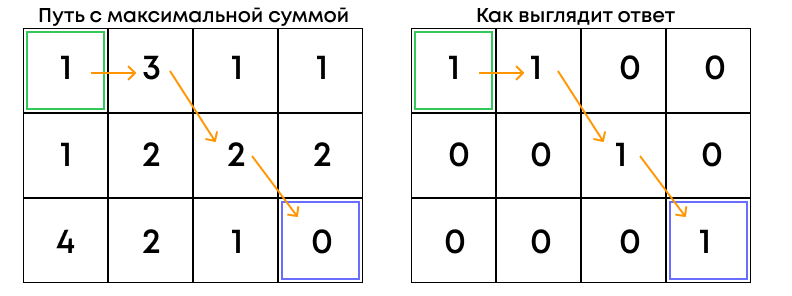

In [ ]:
import numpy as np

matrix = [[1, 3, 1, 1],
       [1, 2, 2, 2],
       [4, 2, 1, 0]]

matrix = np.array(matrix)
matrix

array([[1, 3, 1, 1],
       [1, 2, 2, 2],
       [4, 2, 1, 0]])

In [ ]:
for i in range(1, m):
    matrix[0][i] += matrix[0][i-1]

matrix

array([[1, 4, 5, 6],
       [2, 2, 2, 2],
       [6, 2, 1, 0]])

In [ ]:
# Считаем суммы по диагонали
for i in range(1, min(n, m)):  # Двигаемся по диагонали, начиная с (1,1)
    matrix[i][i] += matrix[i-1][i-1]

matrix

array([[1, 4, 5, 6],
       [2, 3, 2, 2],
       [6, 2, 4, 0]])

In [ ]:
for i in range(1, m):
    for j in range(1, n):
        matrix[i][j] += max(matrix[i-1][j], matrix[i][j-1])

matrix[-1][-1]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
def minPathSum(grid):

    m, n = len(grid), len(grid[0])

    for i in range(1, m):
        grid[i][0] += grid[i-1][0]

    for i in range(1, n):
        grid[0][i] += grid[0][i-1]

    for i in range(1, m):
        for j in range(1, n):
            grid[i][j] += min(grid[i-1][j], grid[i][j-1])

    return grid[-1][-1]

In [ ]:
import numpy as np



In [ ]:
arr = np.ones((3,4))

np.fill_diagonal(arr, 100)

arr

array([[100.,   1.,   1.,   1.],
       [  1., 100.,   1.,   1.],
       [  1.,   1., 100.,   1.]])